In [2]:
from commonfunctions import *
import joblib
%matplotlib inline
%load_ext autoreload
%autoreload 2

<ipython-input-5-f70465ae7e46>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))


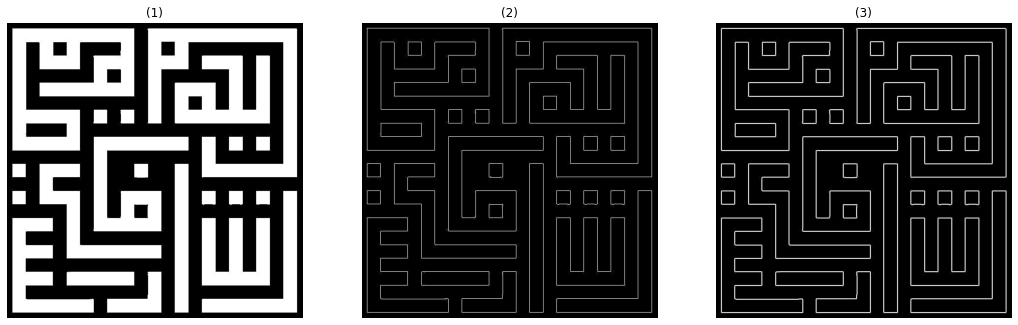

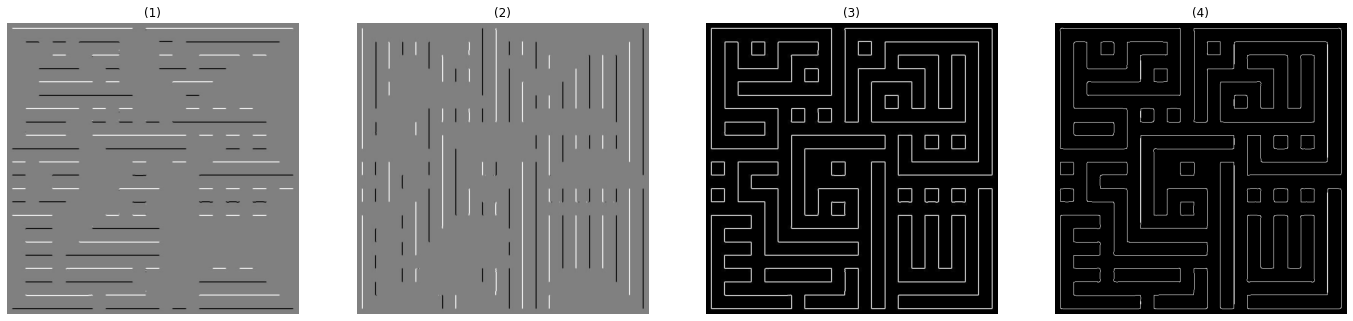

In [5]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))
img_roberts = roberts(img)
img_perwitt = prewitt(img)
img_sobel_h = sobel_h(img)
img_sobel_v = sobel_v(img)
img_sobel = sobel(img)
img_canny = canny(img)
show_images([img,img_roberts,img_perwitt])
show_images([img_sobel_h,img_sobel_v,img_sobel,img_canny])

In [3]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread('ACdata_base/9/1496.jpg')
h = hog.compute(im)
print(hog)

<HOGDescriptor 000002617767E8F0>


In [4]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

img = cv2.imread('ACdata_base/9/1496.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
#print(lines)

HV = 0;
Total = 0
for line in lines:
    if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
        HV+=1;
    Total +=1

HVSL = Total - HV

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
def HVSL(gray):    
    edges = cv2.Canny(gray,50,150,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/180,80)
    print(lines)
    if (lines is None): 
        return -1 
    HV = 0;
    Total = 0
    for line in lines:
        if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
            HV+=1;
        Total +=1

    return HV/Total
def HPP(binary_image):
    #de beta5od binary image w betraga3 histogram bey3ed fe kol line fe kam pizel 1 w da bey3abar 3an 2el base line
    x=np.sum(binary_image, axis = 1)
    x=x/np.max(x)
    return x
def pre_process(x):
    #bet7awel le binary
    if x[0][0][0]>128:
        return (x<128).astype(int)
    else:
        return (x>128).astype(int)
def get_histogram_of_gradients(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    _, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    hist=np.histogram(angle)[0]
    print(hist)
    return hist/hist.max()
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    #print(mask.any(1),mask.any(0))
    return img[np.ix_(mask.any(1).reshape(-1),mask.any(0).reshape(-1))]

In [88]:
from skimage.morphology import skeletonize
import cv2


<ipython-input-89-98155b59a6aa>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))


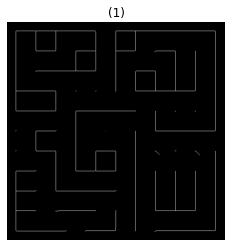

In [89]:
img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))

ret,img = cv2.threshold(img,127,255,0)
img[img==255]=1
skelImg=skeletonize(img,method='zhang')
show_images([skelImg])

In [92]:
# LVL used to separete Kufi and Square Kufi 
def LVL(gray): 
    
    #converting to binary image 
    ret,img = cv2.threshold(gray,127,255,0)
    img[img==255 ]=1
    
    #converting to skeleton 
    skelImg=skeletonize(img,method='zhang')
    skelImg=skelImg.astype('uint8')

    
    #getting all lines in the image
    lines = cv2.HoughLines(skelImg,1,np.pi/180,80)
    print(lines)
    # if no lines is found
    if (lines is None): 
        return -1 
    
    Vertical = 0 #number of vertical lines 
    Total = 0   #number of  lines 
    # counting the vertical lines 
    for line in lines:
        if( abs(line[0,1] - np.pi/2) < 0.001 ):
            Vertical+=1;
        Total +=1

   
    #(a) the text height from the bottomto top 
    #(b) the number of detected vertical lines
    print(Vertical)
    #(c) the length of the highest detectedvertical line 
    #(d) the difference ratio between the text height and the highest vertical line 
    #(e) the variance among the vertical lines
    return Vertical/Total

In [93]:
imag = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))
cropped=crop_image(imag,tol=0)
LVL(cropped)

[[[565.          0.       ]]

 [[ 16.          1.5707964]]

 [[ 16.          0.       ]]

 [[345.          0.       ]]

 [[181.          1.5707964]]

 [[236.          1.5707964]]

 [[510.          1.5707964]]

 [[291.          0.       ]]

 [[565.          1.5707964]]

 [[455.          0.       ]]

 [[456.          1.5707964]]

 [[181.          0.       ]]

 [[510.          0.       ]]

 [[126.          0.       ]]

 [[126.          1.5707964]]

 [[291.          1.5707964]]

 [[400.          0.       ]]

 [[ 71.          1.5707964]]

 [[401.          1.5707964]]

 [[236.          0.       ]]

 [[346.          1.5707964]]

 [[ 71.          0.       ]]]
11


<ipython-input-93-198a8aa2c755>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  imag = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))


0.5

In [94]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 9

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('ACdata_base',
                                    target_size=(500, 500),
                                    batch_size=73139,
                                    class_mode='sparse',
                                   color_mode='grayscale',
                                    shuffle=True,
    seed=42 )
X , y = data.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11);
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=11);
X_train.shape

NameError: name 'ImageDataGenerator' is not defined

In [17]:
pre_processed_train=[pre_process(patch) for patch in X_train] # de bet7awel 2el training set le binary fa law feature sha8ala 3ala binary hanesta5dem da

In [20]:
cropped_images=[crop_image(patch) for patch in pre_processed_train]

In [53]:
resized_cropped_images=[cv2.resize(np.array(cropped, dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA) for cropped in cropped_images]

In [272]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


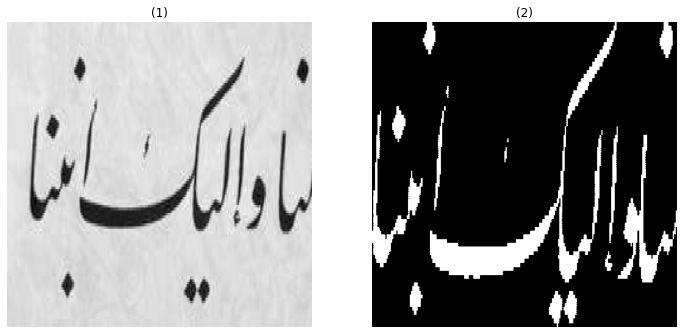

In [54]:
show_images([X_train[0],resized_cropped_images[0]])

In [273]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 500, 500, 1)


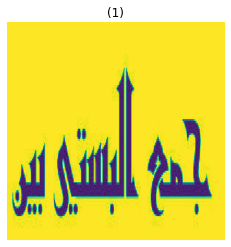

[255.]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


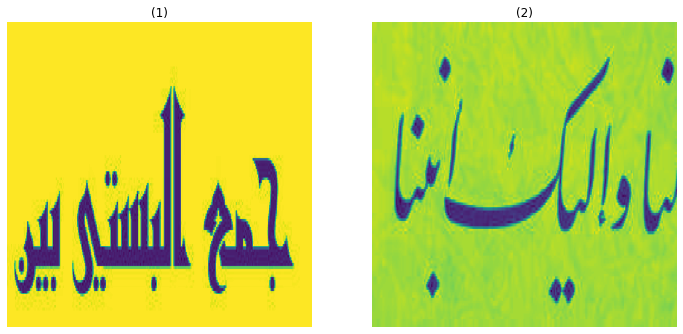

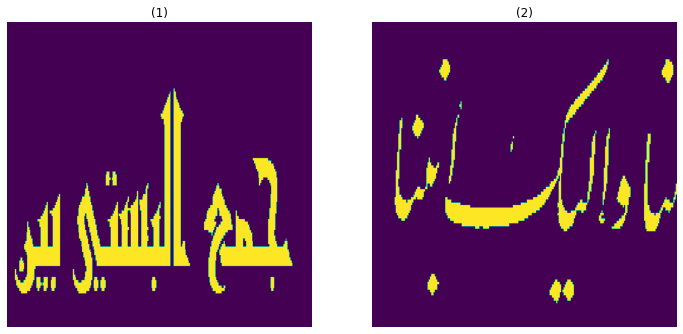

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [274]:
show_images([X_train[1]])
print(X_train[1][0][0])
print(pre_process(X_train[1]))
show_images([X_train[1],X_train[0]])
show_images([pre_process(X_train[1]),pre_process(X_train[0])]) 
print(pre_process(X_train[1]))

In [27]:

values = []
for gray in X_train:
    print(gray.shape)
    values.append(HVSL(np.uint8(gray)))
    
    

(500, 500, 1)
[[[3.0300000e+02 1.5707964e+00]]

 [[4.5400000e+02 0.0000000e+00]]

 [[2.9500000e+02 1.5707964e+00]]

 [[2.8300000e+02 1.6231562e+00]]

 [[2.9100000e+02 1.6231562e+00]]

 [[4.7000000e+01 0.0000000e+00]]

 [[2.9900000e+02 1.5707964e+00]]

 [[3.0800000e+02 1.5707964e+00]]

 [[3.3800000e+02 1.5707964e+00]]

 [[3.3400000e+02 1.5707964e+00]]

 [[3.2700000e+02 6.9813170e-02]]

 [[3.8800000e+02 1.3962634e-01]]

 [[3.9100000e+02 1.5707964e-01]]

 [[4.4000000e+01 0.0000000e+00]]

 [[3.0900000e+02 0.0000000e+00]]

 [[2.8600000e+02 1.6231562e+00]]

 [[4.5100000e+02 0.0000000e+00]]

 [[5.2000000e+01 5.2359879e-02]]

 [[2.7600000e+02 1.7104226e+00]]

 [[3.0700000e+02 1.5533431e+00]]

 [[2.9000000e+02 1.5707964e+00]]

 [[2.8800000e+02 1.6231562e+00]]

 [[3.0800000e+02 1.5184364e+00]]

 [[2.8200000e+02 1.6580628e+00]]]
(500, 500, 1)
[[[ 273.           0.       ]]

 [[ 404.           1.5707964]]

 [[ 399.           1.5707964]]

 [[ 268.           0.       ]]

 [[ 257.           0.       

[[[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 4.5000000e+01  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[-2.7000000e+01  3.0892327e+00]]

 [[ 2.8400000e+02  1.5882496e+00]]

 [[-1.8000000e+01  3.0543261e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 3.1800000e+02  1.4835298e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[-2.2000000e+01  3.0717795e+00]]

 [[ 2.8900000e+02  1.5533431e+00]]

 [[ 2.9300000e+02  1.5533431e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  1.6231562e+00]]

 [[-2.8200000e+02  3.1066861e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 2.6700000e+02  7.8539819e-01]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 2.7900000e+02  1.5882496e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  7.8539819

[[[ 3.6800000e+02  1.5707964e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  1.5533431e+00]]

 [[ 3.6000000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  1.7453292e-02]]

 [[ 9.8000000e+01  1.7453292e-02]]

 [[ 2.0900000e+02  0.0000000e+00]]

 [[-9.2000000e+01  3.1241393e+00]]

 [[ 2.8300000e+02  1.5882496e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 3.1100000e+02  1.5882496e+00]]

 [[ 3.6600000e+02  1.5533431e+00]]

 [[-3.8100000e+02  3.1241393e+00]]

 [[ 2.9100000e+02  1.5533431e+00]]

 [[ 3.2500000e+02  1.5882496e+00]]

 [[ 2.9500000e+02  1.5533431

 [[-2.5900000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[-1.6800000e+02  3.1066861e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 1.5000000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  2.0943952e-01]]

 [[-4.1100000e+02  3.1241393e+00]]

 [[-1.1800000e+02  3.1066861e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[-4.4100000e+02  3.1066861e+00]]

 [[ 2.8700000e+02  1.9198622e-01]]

 [[-1.2300000e+02  3.1241393e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.5100000e+02  7.8539819e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[-1.2500000e+02  3.1241393e+00]]

 [[-1.1400000e

[[[ 5.6000000e+01  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[-5.2000000e+01  3.1241393e+00]]

 [[ 4.7000000e+02  1.0471976e-01]]

 [[ 4.6600000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  1.7453292e-02]]

 [[ 4.7200000e+02  1.2217305e-01]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 4.7000000e+02  5.2359879e-02]]

 [[ 2.0000000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  3.4906585e-02]]

 [[ 1.8600000e+02  1.9198622e-01]]

 [[ 2.0400000e+02  3.4906585e-02]]

 [[ 1.5300000e+02  1.0471976e-01]]

 [[ 6.3000000e+01  1.7453292e-02]]

 [[-4.5900000e+02  3.0717795e+00]]

 [[-4.7100000e+02  3.1241393e+00]]

 [[ 1.5900000e+02  1.2217305e-01]]

 [[ 1.6900000e+02  1.3962634e-01]]

 [[ 3.0300000e+02  1.9198622e-01]]

 [[-4.5800000e+02  3.1241393e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  6.9813170e-02]]

 [[-4.5200000e+02  3.1066861e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  1.9198622e-01]]

 [[ 4.7800000e+02  2.0943952e-01]]

 [[-2.6700000e+02  3.0892327

(500, 500, 1)
[[[-424.           3.0892327]]

 [[-447.           3.0892327]]

 [[-429.           3.106686 ]]

 [[-196.           3.0892327]]

 [[ 453.           0.7853982]]

 [[-201.           3.106686 ]]

 [[-207.           3.1241393]]

 [[ 332.           0.7853982]]

 [[ 211.           0.       ]]

 [[-451.           3.106686 ]]

 [[-432.           3.106686 ]]

 [[ 214.           0.       ]]

 [[  95.           0.       ]]]
(500, 500, 1)
[[[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 9.5000000e+01  0.0000000e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 3.6400000e+0

[[[ 4.3100000e+02  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.8100000e+02  0.0000000e+00]]

 [[ 4.2800000e+02  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 4.2900000e+02  1.3962634e-01]]

 [[ 2.9800000e+02  1.7453292e-01]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 4.8600000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  2.2689280e-01]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[-4.3800000e+02  3.1241393e+00]]

 [[ 4.7100000e+02  1.7453292e-02]]

 [[-4.2800000e+02  3.0892327e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[-4.0000000e+02  2.9670596e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000

 [[ -23.           3.0019662]]]
(500, 500, 1)
[[[ 3.4000000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.9600000e+02  0.0000000e+00]]

 [[ 3.9800000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  1.2740903e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.5600000e+02  1.5184364e+00]]

 [[ 3.2800000e+02  1.5533431e+00]]

 [[ 3.4800000e+02  1.5882496e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 4.9900000e+02  7.8539819e-01]]

 [[ 3.3300000e+02  1.5184364e+00]]

 [[ 3.5100000e+02  1.5358897e+00]]

 [[-3.2300000e+02  3.1066861e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 3.6100000e+02 

[[[456.          1.5707964]]

 [[ 66.          1.5707964]]

 [[400.          0.       ]]

 [[383.          0.       ]]

 [[  7.          0.       ]]

 [[202.          0.       ]]

 [[284.          0.       ]]

 [[482.          0.       ]]

 [[301.          0.       ]]

 [[185.          0.       ]]

 [[180.          1.5707964]]

 [[204.          1.5707964]]]
(500, 500, 1)
[[[-1.0200000e+02  3.1241393e+00]]

 [[-2.7100000e+02  3.1241393e+00]]

 [[ 4.3500000e+02  1.7453292e-02]]

 ...

 [[-3.2000000e+02  3.1066861e+00]]

 [[-1.6200000e+02  3.1066861e+00]]

 [[-6.5000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[371.          1.5707964]]

 [[357.          1.5707964]]

 [[350.          1.5707964]]

 [[364.          1.5707964]]

 [[344.          1.5707964]]

 [[372.          1.553343 ]]

 [[349.          1.5882496]]

 [[310.          0.       ]]

 [[363.          1.5882496]]

 [[304.          0.       ]]

 [[358.          1.553343 ]]

 [[337.          1.5707964]]

 [[348.          1.6057029]]



(500, 500, 1)
[[[  74.           0.       ]]

 [[ 335.           0.       ]]

 [[ 337.           1.5707964]]

 ...

 [[-118.           3.0892327]]

 [[-327.           3.106686 ]]

 [[-266.           3.1241393]]]
(500, 500, 1)
[[[ 3.8900000e+02  1.5707964e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 1.4300000e+02  0.0000000e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 1.6400000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  1.5533431e+00]]

 [[ 3.8200000e+02  1.5882496e+00]]

 [[ 8.2000000e+01  1.7453292e-02]]

 [[ 1.6900000e+02  1.7453292e-02]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[-1.3000000e+02 

 [[-2.5200000e+02  3.0892327e+00]]]
(500, 500, 1)
[[[ 27.          0.       ]]

 [[ 22.          1.5707964]]

 [[467.          1.5707964]]

 [[268.          1.5707964]]

 [[418.          1.5707964]]

 [[ 75.          0.       ]]

 [[457.          0.       ]]

 [[318.          1.5707964]]

 [[265.          0.       ]]

 [[219.          1.5707964]]

 [[367.          1.5707964]]

 [[313.          0.       ]]

 [[ 71.          1.5707964]]

 [[170.          1.5707964]]

 [[409.          0.       ]]

 [[120.          1.5707964]]

 [[122.          0.       ]]

 [[360.          0.       ]]

 [[218.          0.       ]]]
(500, 500, 1)
[[[3.1600000e+02 1.5707964e+00]]

 [[1.8000000e+01 0.0000000e+00]]

 [[3.1000000e+02 1.5707964e+00]]

 [[4.5500000e+02 0.0000000e+00]]

 [[3.3400000e+02 1.5707964e+00]]

 [[1.8600000e+02 0.0000000e+00]]

 [[2.1000000e+01 0.0000000e+00]]

 [[3.2800000e+02 1.5707964e+00]]

 [[3.2200000e+02 1.5707964e+00]]

 [[4.5800000e+02 0.0000000e+00]]

 [[4.7200000e+02 0.0000000

[[[ 1.4800000e+02  0.0000000e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  3.8397244e-01]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 4.2800000e+02  3.8397244e-01]]

 [[ 4.1300000e+02  3.3161256e-01]]

 [[ 1.5500000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 4.2200000e+02  3.6651915e-01]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 4.1700000e+02  3.4906584e-01]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  4.1887903e-01]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 1.5800000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  0.0000000e+00]]

 [[ 4.3400000e+02  3.8397244e-01]]

 [[ 3.6500000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  3.6651915

[[[357.          1.5707964]]

 [[371.          1.5707964]]

 [[350.          1.5707964]]

 [[364.          1.5707964]]

 [[344.          1.5707964]]

 [[337.          1.5707964]]

 [[330.          1.5707964]]

 [[348.          1.5882496]]

 [[352.          1.553343 ]]

 [[ 62.          0.       ]]

 [[359.          1.553343 ]]

 [[345.          1.6057029]]

 [[224.          0.       ]]

 [[356.          1.553343 ]]

 [[371.          1.5009831]]

 [[360.          1.5358897]]

 [[ 59.          0.       ]]

 [[366.          1.5184364]]

 [[357.          1.5358897]]

 [[373.          1.553343 ]]

 [[340.          1.6231562]]

 [[489.          0.       ]]

 [[363.          1.5882496]]

 [[364.          1.5184364]]

 [[354.          1.553343 ]]

 [[418.          1.5707964]]

 [[342.          1.5882496]]

 [[ 55.          0.       ]]

 [[365.          1.5358897]]

 [[331.          1.6231562]]

 [[221.          0.       ]]

 [[492.          0.       ]]

 [[353.          1.6057029]]

 [[343.   

[[[ 7.6000000e+01  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 1.2000000e+01  1.5707964e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  1.5707964e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 1.3600000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 4.8300000e+02  1.5707964e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 9.5000000e+01  1.5707964e+00]]

 [[ 4.0300000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  1.5707964e+00]]

 [[ 2.5700000e+02  1.5707964e+00]]

 [[ 3.4000000e+01  1.5707964e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 2.1700000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  1.5707964e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 2.3800000e+02  1.5707964e+00]]

 [[ 5.3000000e+01  1.5707964e+00]]

 [[ 1.5800000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 4.9100000e+02  0.0000000e+00]]

 [[ 1.6000000e+02  0.0000000

(500, 500, 1)
[[[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.7700000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 3.6000000e+01  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5533431e+00]]

 [[ 1.9600000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5882496e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 3.1800000e+02  1.5009831e+00]]

 [[ 2.9900000e+02  1.5533431e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  1.5707964e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 4.4200000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  1.4835298e+00]]

 [[ 1.9000000e

[[[ 1.7900000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 3.5000000e+01  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  3.4906585e-02]]

 [[ 2.1800000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 2.2500000e+02  1.7453292e-02]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[ 1.9900000e+02  3.4906585e-02]]

 [[-1.7400000e+02  3.1241393e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 2.3400000e+02  5.2359879e-02]]

 [[ 2.6600000e+02  0.0000000

(500, 500, 1)
[[[ 3.9400000e+02  1.0471976e-01]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.4900000e+02  1.6231562e+00]]

 ...

 [[ 1.7300000e+02  1.8151424e+00]]

 [[-1.1000000e+01  3.0194197e+00]]

 [[-2.8000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 489.           0.       ]]

 [[ 441.           0.       ]]

 [[ 445.           0.       ]]

 ...

 [[-333.           3.1241393]]

 [[-132.           3.1241393]]

 [[ -63.           3.1241393]]]
(500, 500, 1)
[[[ 4.2000000e+02  5.2359879e-02]]

 [[-3.0300000e+02  3.0717795e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[-4.4200000e+02  3.1241393e+00]]

 [[ 4.1700000e+02  3.4906585e-02]]

 [[ 2.9500000e+02  1.2217305e-01]]

 [[ 2.8900000e+02  1.2217305e-01]]

 [[ 1.6000000e+02  3.4906585e-02]]

 [[ 3.2800000e+02  8.7266460e-02]]

 [[-3.4100000e+02  3.0543261e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[ 2.7600000e+02  3.4906585e-02]]

 [[ 4.1800000e+02  5.2359879e-02]]

 [[-3.4700000e+02  3.0717795e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

(500, 500, 1)
[[[ 1.1000000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[-3.0400000e+02  3.1066861e+00]]

 [[-4.6700000e+02  3.1066861e+00]]

 [[-4.6300000e+02  3.1066861e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[-3.0800000e+02  3.1241393e+00]]

 [[-3.1300000e+02  3.1241393e+00]]

 [[ 8.1000000e+01  1.7453292e-02]]

 [[-4.7100000e+02  3.1241393e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[-6.9000000e+01  3.1066861e+00]]

 [[-4.6800000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-230.           3.106686 ]]

 [[ 306.           1.5707964]]

 [[ 343.           1.5707964]]

 ...

 [[ -71.           3.0892327]]

 [[-468.           3.106686 ]]

 [[-345.           3.106686 ]]]
(500, 500, 1)
[[[4.8100000e+02 0.0000000e+00]]

 [[4.9200000e+02 1.5707964e+00]]

 [[4.4000000e+02 0.0000000e+00]]

 [[3.0200000e+02 1.5707964e+00]]

 [[4.4900000e+02 0.0000000e+00]]

 [[6.0000000e+00 1.5707964e+00]]

 [[2.5100000e+02

[[[ 490.           0.       ]]

 [[ 398.           0.       ]]

 [[ 103.           0.       ]]

 [[  13.           0.       ]]

 [[  41.           1.5707964]]

 [[ 468.           0.       ]]

 [[ 262.           0.       ]]

 [[ 376.           0.       ]]

 [[ 127.           0.       ]]

 [[  80.           0.       ]]

 [[ 241.           0.       ]]

 [[ 422.           0.       ]]

 [[ 448.           1.5707964]]

 [[ 444.           0.       ]]

 [[ 285.           0.       ]]

 [[ 148.           0.       ]]

 [[ 217.           0.       ]]

 [[ 122.           1.5707964]]

 [[ 353.           0.       ]]

 [[ 194.           0.       ]]

 [[ 207.           1.5707964]]

 [[ 171.           0.       ]]

 [[ 331.           0.       ]]

 [[ 308.           0.       ]]

 [[ 283.           1.5707964]]

 [[  35.           0.       ]]

 [[-211.           3.1241393]]

 [[ 125.           1.553343 ]]]
(500, 500, 1)
[[[ 497.           0.       ]]

 [[ 266.           0.       ]]

 [[  23.           0.     

[[[-3.3200000e+02  3.1241393e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.4400000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  3.4906585e-02]]

 [[-1.0900000e+02  3.1241393e+00]]

 [[-3.2800000e+02  3.1241393e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  1.5358897e+00]]]
(500, 500, 1)
[[[-403.           3.1241393]]

 [[-326.           3.1241393]]

 [[-139.           3.1241393]]

 ...

 [[-125.           3.0717795]]

 [[-253.           3.0892327]]

 [[ -52.           3.0892327]]]
(500, 500, 1)
[[[ 3.7500000e+02  7.8539819e-01]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 4.3200000e+02  2.9670596e-01]]

 [[ 4.3600000e+02  3.1415927e-01]]

 [[ 4.0700000e+02  1.5707964e+00]]

 [[ 2.9700000e+02  3.3161256e-01]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  4.7123888e-01]]

 [[ 4.0200000e+02  1.5882496e+00]]

 [[ 3.5600000e+02  7.8539819e-01]]

 [[ 4.5200000e+02  3.4906584e-01]]

 [[ 4.1700000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  3.1415927e-01]]

 [[ 4.4100000e+02 

[[[ 206.           0.       ]]

 [[ 244.           0.       ]]

 [[ 405.           1.5707964]]

 ...

 [[ -13.           3.0892327]]

 [[-119.           3.106686 ]]

 [[-290.           3.1241393]]]
(500, 500, 1)
[[[ 1.7000000e+01  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 6.3000000e+01  0.0000000e+00]]

 [[ 2.7000000e+01  0.0000000e+00]]

 [[ 1.5200000e+02  1.5707964e+00]]

 [[ 1.2000000e+01  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 9.6000000e+01  1.5707964e+00]]

 [[ 1.2200000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0000000e+00]]

 [[ 4.1000000e+01  0.0000000e+00]]

 [[ 6.7000000e+01  1.5707964e+00]]

 [[ 1.7700000e+02  1.5707964e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 4.1000000e+01  1.5707964e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  0.0000000e+00

(500, 500, 1)
[[[ 1.3300000e+02  0.0000000e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  1.7453292e-02]]

 [[ 2.6800000e+02  3.8397244e-01]]

 [[ 2.4700000e+02  7.8539819e-01]]

 [[-1.2700000e+02  3.1241393e+00]]

 [[ 4.0400000e+02  4.3633232e-01]]

 [[ 2.4500000e+02  7.8539819e-01]]

 [[ 2.6100000e+02  1.5533431e+00]]

 [[-1.2400000e+02  3.1066861e+00]]

 [[ 1.3900000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  2.9670596e-01]]

 [[ 3.9800000e+02  4.0142572e-01]]

 [[-1.1700000e+02  3.0892327e+00]]

 [[-1.2900000e+02  3.1241393e+00]]

 [[-1.0500000e+02  3.0717795e+00]]

 [[-1.9000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 4.2600000e+02  0.0000000e+00]]

 [[ 2.4200000e+02  0.0000000e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[ 2.4400000e+02  0.0000000e+00]]

 [[ 2.7200000e+02  0.0000000e+00]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[-2.8600000e+02  3.1241393e+00]]



(500, 500, 1)
[[[ 464.           0.       ]]

 [[ 408.           1.5707964]]

 [[ 213.           0.       ]]

 ...

 [[-127.           3.0892327]]

 [[ -93.           3.0892327]]

 [[-319.           3.1241393]]]
(500, 500, 1)
[[[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 4.7000000e+02  3.4906585e-02]]

 [[ 1.3000000e+02  1.7453292e-02]]

 [[ 4.2100000e+02  1.5707964e-01]]

 [[ 4.6500000e+02  3.4906585e-02]]

 [[ 2.8400000e+02  3.4906585e-02]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  1.5707964e-01]]

 [[ 4.0100000e+02  3.4906585e-02]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  1.7453292e-01]]

 [[ 4.2100000e+02  1.9198622e-01]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  1.7453292e-02]]

 [[ 2.7800000e+02  1.7453292e-02]]

 [[ 3.6000000e+02  3.4906585e-02]]

 [[ 3.9600000e+02  3.4906585e-02]]

 [[ 4.8400000e+02  1.9198622e-01]]

 [[ 3.5800000e+02  1.7453292e-02]]

 [[ 4.1800000e+02 

 [[   1.           3.1241393]]]
(500, 500, 1)
[[[ 4.0200000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5533431e+00]]

 [[ 3.3100000e+02  1.5533431e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.9600000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5358897e+00]]

 [[ 3.2400000e+02  1.5533431e+00]]

 [[ 1.0100000e+02 

(500, 500, 1)
[[[-141.           3.1241393]]

 [[-207.           3.1241393]]

 [[-448.           3.1241393]]

 ...

 [[-141.           3.0892327]]

 [[-107.           3.0892327]]

 [[ -41.           3.106686 ]]]
(500, 500, 1)
[[[ 3.8900000e+02  1.5533431e+00]]

 [[ 3.9500000e+02  1.5358897e+00]]

 [[ 3.9200000e+02  1.5358897e+00]]

 [[ 3.8700000e+02  1.5707964e+00]]

 [[ 3.9800000e+02  1.5184364e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 3.8200000e+02  1.5707964e+00]]

 [[ 4.0000000e+02  1.5009831e+00]]

 [[-2.6400000e+02  3.1066861e+00]]

 [[-6.6000000e+01  3.1241393e+00]]

 [[-5.5000000e+01  3.0717795e+00]]

 [[-3.4000000e+02  3.1241393e+00]]

 [[-3.4700000e+02  3.1066861e+00]]

 [[ 3.3000000e+02  1.6755161e+00]]

 [[-2.5400000e+02  3.1066861e+00]]

 [[-5.9000000e+01  3.0892327e+00]]

 [[ 1.8000000e+01  2.3561945e+00]]

 [[ 1.0400000e+02  2.4434610e-01]]

 [[ 3.9800000e+02  1.4835298e+00]]

 [[-2.3000000e+02  3.1066861e+00]]

 [[ 3.5700000e+02  1.6231562e+00]]

 [[ 3.2300000e+02 

[[[ 3.0500000e+02  1.5707964e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 2.8700000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5882496e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 1.0300000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  1.5358897e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  4.7123888

(500, 500, 1)
[[[ 2.9300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 4.9500000e+02  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 1.6500000e+02  0.0000000e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 4.8800000e+02  1.5707964e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 1.8200000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 1.8300000e+02  1.5707964e+00]]

 [[ 7.0000000e+00  0.0000000e+00]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 1.0000000e+01  1.5707964e+00]]

 [[ 4.0200000e+02  1.5707964e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 9.1000000e

[[[ 3.1700000e+02  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 4.6900000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5533431e+00]]

 [[ 3.2400000e+02  1.5358897e+00]]

 [[ 2.4800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.6057029e+00]]

 [[ 3.2100000e+02  1.5533431e+00]]

 [[ 3.0700000e+02  1.5882496e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[ 3.1300000e+02  1.5882496e+00]]

 [[ 2.8200000e+02  1.5009831e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  1.7453292e-02]]

 [[-4.6500000e+02  3.1241393e+00]]

 [[ 2.7500000e+02  1.5533431

(500, 500, 1)
[[[ 3.2800000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 4.3200000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5009831e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5882496e+00]]

 [[-3.1800000e+02  3.1241393e+00]]

 [[-7.4000000e+01  3.1241393e+00]]

 [[ 3.4500000e+02  1.4660766e+00]]

 [[ 3.3900000e+02  1.5533431e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5882496e+00]]

 [[-3.7600000e+02  3.1241393e+00]]

 [[ 3.4900000e

[[[ 494.           0.       ]]

 [[  79.           0.       ]]

 [[ 393.           0.       ]]

 ...

 [[-349.           3.106686 ]]

 [[-191.           3.106686 ]]

 [[-156.           3.1241393]]]
(500, 500, 1)
[[[ 8.9000000e+01  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  1.5707964e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  1.9198622e-01]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.7453292e-02

 [[ 3.3800000e+02  1.2740903e+00]]]
(500, 500, 1)
[[[-2.9000000e+02  3.1241393e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 3.3600000e+02  1.9198622e-01]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[-3.2300000e+02  3.1241393e+00]]

 [[-3.2600000e+02  3.1241393e+00]]

 [[-4.4400000e+02  3.1241393e+00]]

 [[-2.0900000e+02  3.1241393e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[-4.5900000e+02  3.1241393e+00]]

 [[ 3.3300000e+02  1.9198622e-01]]

 [[ 4.4900000e+02  0.0000000e+00]]

 [[ 4.5400000e+02  1.7453292e-02]]

 [[ 1.6100000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  1.7453292e-02]]

 [[ 3.3200000e+02  1.7453292e-01]]

 [[ 2.1100000e+02  0.0000000e+00]]

 [[-4.6100000e+02  3.1241393e+00]]

 [[-4.5700000e+02  3.1066861e+00]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[-2.0600000e+02  3.1066861e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  4.5378560e-01]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[-2.8000000e+01  3.0892327e+00]]

 [[-2.0400000e+02  3.1066861e+00]]

 [[ 3.3500000e

 [[-7.5000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.6700000e+02  1.5707964e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 2.5600000e+02  1.7453292e-02]]

 ...

 [[-2.3400000e+02  3.1066861e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[-2.5000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 497.           0.       ]]

 [[ 369.           1.5707964]]

 [[ 375.           1.5707964]]

 ...

 [[-345.           3.0892327]]

 [[-265.           3.106686 ]]

 [[-253.           3.1241393]]]
(500, 500, 1)
[[[ 3.8400000e+02  1.5707964e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 7.1000000e+01  0.0000000e+00]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 8.1000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 4.0400000e+02  0.0000000e+00]]

 [[ 3.9300000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5882496e+00]]

 [[ 3.5500000e+02  1.5707964e+00]]

[[[-423.           3.1241393]]

 [[-333.           3.106686 ]]

 [[-254.           3.1241393]]

 ...

 [[-421.           3.0892327]]

 [[-384.           3.0892327]]

 [[-431.           3.106686 ]]]
(500, 500, 1)
[[[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  1.5707964e+00]]

 [[ 3.7100000e+02  1.4835298e+00]]

 [[ 3.1400000e+02  1.5707964e+00]]

 [[ 3.8000000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  0.0000000e+00]]

 [[-4.1900000e+02  3.1066861e+00]]

 [[ 3.3100000e+02  1.5707964e+00]]

 [[ 3.3600000e+02  1.5707964e+00]]

 [[-4.1600000e+02  3.0892327e+00]]

 [[ 3.2800000e+02  1.4835298e+00]]

 [[ 3.2600000e+02  1.5707964e+00

 [[ 3.3700000e+02  9.0757120e-01]]]
(500, 500, 1)
[[[ 145.           0.       ]]

 [[  24.           0.       ]]

 [[ 257.           0.       ]]

 ...

 [[ -52.           3.106686 ]]

 [[-414.           3.1241393]]

 [[ -51.           3.1241393]]]
(500, 500, 1)
[[[ 4.4100000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 3.2500000e+02  1.5707964e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[-4.3300000e+02  3.1066861e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  1.5882496e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[-2.1600000e+02  3.1066861e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 3.2800000e+02 

(500, 500, 1)
[[[ 248.           0.       ]]

 [[ 325.           1.5707964]]

 [[ 347.           1.5707964]]

 ...

 [[-255.           3.1241393]]

 [[ -81.           3.1241393]]

 [[ -58.           3.1241393]]]
(500, 500, 1)
[[[ 3.7400000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 1.5600000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  1.5882496e+00]]

 [[-1.5100000e+02  3.1241393e+00]]

 [[ 3.3900000e+02  1.5707964e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 1.3500000e+02  1.7453292e-02]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[-1.2500000e+02 

(500, 500, 1)
[[[432.          0.       ]]

 [[490.          0.       ]]

 [[452.          0.       ]]

 [[414.          0.       ]]

 [[393.          0.       ]]

 [[484.          1.5707964]]

 [[471.          0.       ]]

 [[375.          0.       ]]

 [[  9.          0.       ]]

 [[433.          1.5707964]]

 [[409.          1.5707964]]

 [[ 13.          1.5707964]]

 [[357.          0.       ]]

 [[460.          1.5707964]]

 [[335.          1.5707964]]

 [[187.          1.5707964]]

 [[336.          0.       ]]

 [[ 37.          1.5707964]]

 [[359.          1.5707964]]

 [[383.          1.5707964]]

 [[ 62.          1.5707964]]

 [[112.          1.5707964]]

 [[ 87.          1.5707964]]

 [[317.          0.       ]]

 [[297.          0.       ]]

 [[163.          1.5707964]]

 [[ 29.          0.       ]]

 [[137.          1.5707964]]

 [[278.          0.       ]]

 [[284.          1.5707964]]

 [[260.          1.5707964]]

 [[211.          1.5707964]]

 [[308.          1.5707964

[[[  17.           0.       ]]

 [[ 332.           1.5707964]]

 [[ 307.           1.5707964]]

 [[ 346.           0.       ]]

 [[ 336.           1.5707964]]

 [[-335.           3.1241393]]

 [[ 303.           1.5707964]]

 [[-295.           3.1241393]]

 [[-301.           3.1241393]]

 [[ 329.           1.5882496]]

 [[  11.           0.       ]]

 [[ 305.           0.       ]]

 [[ 367.           0.       ]]

 [[ 268.           0.       ]]

 [[ 339.           1.553343 ]]

 [[-363.           3.1241393]]

 [[ 196.           0.       ]]

 [[ -13.           3.1241393]]

 [[ 299.           0.       ]]

 [[ 371.           0.       ]]

 [[-408.           3.106686 ]]

 [[ 339.           1.4835298]]

 [[ 300.           1.5882496]]

 [[ 338.           0.       ]]

 [[ 310.           1.553343 ]]]
(500, 500, 1)
[[[ 3.1000000e+02  0.0000000e+00]]

 [[ 4.4200000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 3.7000000e+01  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.

[[[ 4.2300000e+02  8.7266460e-02]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.0700000e+02  1.4660766e+00]]

 [[ 3.0600000e+02  1.4835298e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 3.0900000e+02  1.4660766e+00]]

 [[ 3.1100000e+02  1.4486233e+00]]

 [[ 3.0200000e+02  1.5009831e+00]]

 [[ 3.0600000e+02  1.3788100e+00]]

 [[ 2.8900000e+02  1.5533431e+00]]

 [[ 2.9100000e+02  1.5358897e+00]]

 [[ 3.0300000e+02  1.5358897e+00]]

 [[ 2.7800000e+02  1.5707964e+00]]

 [[ 2.7000000e+02  1.6231562e+00]]

 [[ 4.5200000e+02  1.7453292e-01]]

 [[ 2.4400000e+02  1.5707964e+00]]

 [[ 4.4900000e+02  1.7453292e-01]]

 [[ 4.2800000e+02  1.0471976e-01]]

 [[ 3.0500000e+02  1.4660766e+00]]

 [[ 3.0400000e+02  1.5009831e+00]]

 [[ 3.1000000e+02  1.5009831e+00]]

 [[ 3.0800000e+02  1.5184364e+00]]

 [[ 3.0900000e+02  1.4137167

[[[490.          0.       ]]

 [[  9.          1.5707964]]

 [[  9.          0.       ]]

 [[490.          1.5707964]]

 [[466.          0.       ]]

 [[306.          0.       ]]

 [[282.          0.       ]]

 [[ 32.          1.5707964]]

 [[215.          1.5707964]]

 [[170.          1.5707964]]

 [[192.          1.5707964]]

 [[443.          0.       ]]

 [[444.          1.5707964]]

 [[329.          0.       ]]

 [[260.          0.       ]]

 [[146.          0.       ]]

 [[239.          1.5707964]]

 [[238.          0.       ]]

 [[421.          1.5707964]]

 [[122.          0.       ]]

 [[420.          0.       ]]

 [[260.          1.5707964]]

 [[398.          0.       ]]

 [[352.          0.       ]]

 [[399.          1.5707964]]

 [[285.          1.5707964]]

 [[375.          0.       ]]

 [[466.          1.5707964]]

 [[146.          1.5707964]]

 [[215.          0.       ]]

 [[375.          1.5707964]]

 [[169.          0.       ]]

 [[123.          1.5707964]]

 [[101.   

[[[ 352.           1.5707964]]

 [[ 320.           1.5707964]]

 [[ 492.           0.       ]]

 [[ 347.           1.5707964]]

 [[ 251.           0.       ]]

 [[ 315.           1.5707964]]

 [[ 258.           0.       ]]

 [[ 322.           1.553343 ]]

 [[ 312.           1.5882496]]

 [[-247.           3.1241393]]

 [[ 345.           1.5882496]]

 [[ 349.           1.553343 ]]

 [[ 316.           1.553343 ]]

 [[ 230.           0.       ]]

 [[ 324.           1.5358897]]

 [[ 354.           1.553343 ]]

 [[-488.           3.1241393]]

 [[ 310.           1.6057029]]

 [[ 342.           1.6057029]]

 [[ 486.           0.       ]]

 [[ 393.           0.       ]]

 [[ 318.           1.5882496]]

 [[ 326.           1.5184364]]]
(500, 500, 1)
[[[ 2.7600000e+02  0.0000000e+00]]

 [[ 2.0800000e+02  0.0000000e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 3.7700000e+02  1.5707964e+00]]

 [[-2.7000000e+02  3.1066861e+00]]

 [[-9.0000000e+01  3.1241393e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

[[[-4.2300000e+02  3.1241393e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.0717795e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[-1.6900000e+02  3.1241393e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[-4.1300000e+02  3.1066861e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[-3.5600000e+02  3.0717795e+00]]

 [[-3.2300000e+02  3.1066861e+00]]

 [[-3.3300000e+02  3.1241393e+00]]

 [[-3.6400000e+02  3.0892327e+00]]

 [[-4.6900000e+02  3.1241393e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 6.3000000e+01  5.2359879e-02]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[-4.7500000e+02  3.1241393e+00]]

 [[ 3.5200000e+02  0.0000000e+00]]

 [[-1.5900000e+02  3.1066861e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[-3.4800000e+02  3.1241393e+00]]

 [[-3.1100000e+02  3.1241393e+00]]

 [[ 5.4000000e+01  0.0000000e+00]]

 [[ 2.0100000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  1.7453292e-02]]

 [[ 1.4000000e+01  1.7453292e-02]]

 [[-4.1700000e+02  3.1241393

(500, 500, 1)
[[[298.          1.5707964]]

 [[324.          0.       ]]

 [[312.          1.5707964]]

 [[293.          1.5707964]]

 [[284.          1.5707964]]

 [[279.          1.5707964]]

 [[301.          1.5358897]]

 [[269.          1.6580628]]

 [[309.          1.5358897]]

 [[254.          1.7976891]]

 [[302.          1.553343 ]]

 [[317.          1.5707964]]

 [[290.          1.5882496]]

 [[292.          1.5882496]]

 [[278.          1.6057029]]

 [[274.          1.6231562]]

 [[302.          1.5184364]]

 [[261.          1.6929693]]

 [[321.          0.       ]]

 [[331.          0.       ]]

 [[345.          0.       ]]

 [[306.          1.5184364]]]
(500, 500, 1)
[[[  54.           0.       ]]

 [[  51.           0.       ]]

 [[  59.           0.       ]]

 ...

 [[  53.           2.4783676]]

 [[  28.           2.5830872]]

 [[-408.           3.106686 ]]]
(500, 500, 1)
[[[-330.           3.1241393]]

 [[-415.           3.1241393]]

 [[-165.           3.1241393]]

 ...

[[[ 3.5700000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 4.7300000e+02  0.0000000e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.6000000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 4.7600000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.5100000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5358897e+00]]

 [[-9.7000000e+01  3.0717795e+00]]

 [[ 3.0900000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  0.0000000e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  0.0000000

[[[-2.5000000e+01  3.0717795e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  5.2359879e-02]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[-3.9700000e+02  3.0717795e+00]]

 [[ 4.0900000e+02  1.2217305e-01]]

 [[ 4.0700000e+02  8.7266460e-02]]

 [[-1.7600000e+02  3.0543261e+00]]

 [[-1.8200000e+02  3.1241393e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  1.7453292e-02]]

 [[-3.9300000e+02  3.0543261e+00]]

 [[ 4.0900000e+02  1.7453292e-02]]

 [[ 1.8100000e+02  1.7453292e-02]]

 [[-3.9400000e+02  3.0717795e+00]]

 [[-1.7800000e+02  3.1066861e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 3.0100000e+02  6.9813170e-02]]

 [[-3.9000000e+02  3.0543261e+00]]

 [[ 3.9900000e+02  1.7453292e-02]]

 [[ 4.1200000e+02  1.2217305e-01]]

 [[-4.0300000e+02  3.1241393e+00]]

 [[ 4.0200000e+02  3.4906585e-02]]

 [[-1.0300000e+02  3.0892327e+00]]

 [[-9.9000000e+01  3.0717795e+00]]

 [[ 4.0400000e+02  3.4906585e-02]]

 [[ 4.0800000e+02  5.2359879

[[[ 3.1600000e+02  1.5707964e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[-1.0400000e+02  3.1066861e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[-1.4300000e+02  3.1066861e+00]]

 [[-1.0000000e+02  3.0892327e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 1.8700000e+02  0.0000000e+00]]

 [[ 2.0400000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 7.8000000e+01  0.0000000e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 1.2500000e+02  1.3962634e-01]]

 [[ 1.1700000e+02  2.0943952e-01]]

 [[-1.0300000e+02  3.0892327e+00]]

 [[-1.4600000e+02  3.1066861e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[-1.3800000e+02  3.0892327e+00]]

 [[ 4.2900000e+02  7.8539819e-01]]

 [[-1.8500000e+02  3.0717795e+00]]

 [[-1.8900000e+02  3.0892327e+00]]

 [[-1.4100000e+02  3.0892327e+00]]

 [[-1.0700000e+02  3.1241393e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000

[[[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 4.0100000e+02  1.5707964e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[-2.8000000e+01  3.0019662e+00]]

 [[ 3.7100000e+02  1.5707964e+00]]

 [[ 3.6800000e+02  1.5707964e+00]]

 [[-1.1000000e+01  3.0019662e+00]]

 [[ 3.9900000e+02  1.5707964e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  1.5533431e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 0.0000000e+00  3.0019662e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[-1.8000000e+01  3.0019662e+00]]

 [[ 3.7200000e+02  1.5533431e+00]]

 [[ 3.6500000e+02  1.5882496e+00]]

 [[ 3.7400000e+02  1.5533431e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  1.7453292e-02]]

 [[ 3.9400000e+02  1.5882496e+00]]

 [[ 3.6600000e+02  1.5707964e+00]]

 [[ 3.1500000e+02  1.7453292

[[[ 1.3000000e+02  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  1.5707964e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 1.7900000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 2.7600000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 9.0000000e+00  0.0000000e+00]]

 [[ 3.4900000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[ 3.4000000e+01  0.0000000e+00]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 5.7000000e+01  1.5707964e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[-4.6800000e+02  3.1241393e+00]]

 [[ 2.1100000e+02  1.7453292e-02]]

 [[-4.1600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[-2.9300000e+02  3.1066861e+00]]

 [[-8.7000000e+01  3.1066861e+00]]

 [[ 1.8000000e

 [[-4.2700000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 3.3900000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  1.5882496e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.1900000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5533431e+00]]

 [[ 3.1200000e+02  1.5358897e+00]]

 [[ 3.1400000e+02  1.5358897e+00]]

 [[ 2.9600000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.4311700e+00]]

 [[ 3.1100000e+02  1.5184364e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.4835298e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5358897e+00]]

 [[ 2.7300000e

 [[-121.           3.1241393]]]
(500, 500, 1)
[[[ 186.           0.       ]]

 [[-382.           3.106686 ]]

 [[ 202.           0.       ]]

 ...

 [[-257.           3.0892327]]

 [[-281.           3.1241393]]

 [[ -93.           3.1241393]]]
(500, 500, 1)
[[[ 4.6500000e+02  1.5707964e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 4.0900000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  0.0000000e+00]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 5.0000000e+00  0.0000000e+00]]

 [[ 4.0000000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 4.2000000e+02  1.5707964e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 4.8300000e+02  0.0000000e+00]]

 [[ 2.4000000e+01  0.0000000e+00]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 2.5900000e+02  0.0

[[[ 2.9000000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  0.0000000e+00]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[-3.9200000e+02  3.1241393e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[-3.8000000e+01  3.1241393e+00]]

 [[ 1.6100000e+02  1.7453292e-02]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 4.4000000e+01  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  2.7925268e-01]]

 [[ 3.4600000e+02  1.1519173e+00]]

 [[ 3.2200000e+02  1.3962634e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 2.4400000e+02  1.3962634

[[[ 1.9000000e+01  0.0000000e+00]]

 [[ 3.8700000e+02  0.0000000e+00]]

 [[ 2.4800000e+02  1.5707964e+00]]

 [[ 2.5600000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5707964e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  1.5707964e+00]]

 [[ 2.5700000e+02  1.5358897e+00]]

 [[ 2.6200000e+02  1.5358897e+00]]

 [[ 8.6000000e+01  0.0000000e+00]]

 [[ 2.5900000e+02  1.5533431e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 2.4100000e+02  1.6057029e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.4660766e+00]]

 [[ 2.3800000e+02  1.5707964e+00]]

 [[ 2.6700000e+02  1.5707964e+00]]

 [[ 2.3600000e+02  1.6057029e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 2.2900000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  1.5882496e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5184364e+00]]

 [[ 2.6400000e+02  1.5533431

[[[ 3.0800000e+02  0.0000000e+00]]

 [[ 8.8000000e+01  0.0000000e+00]]

 [[ 7.9000000e+01  0.0000000e+00]]

 [[ 7.3000000e+01  0.0000000e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 8.5000000e+01  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 8.2000000e+01  0.0000000e+00]]

 [[ 2.6500000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 3.3500000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[ 4.0200000e+02  0.0000000e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 6.8000000e+01  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 3.1600000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 3.7100000e+02  7.8539819e-01]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  7.8539819

[[[ 277.           1.5707964]]

 [[ 291.           1.5707964]]

 [[ 279.           1.553343 ]]

 [[ 272.           1.5707964]]

 [[ 434.           0.       ]]

 [[ 441.           0.       ]]

 [[ 281.           1.5707964]]

 [[ 298.           1.5184364]]

 [[ 282.           1.5358897]]

 [[ 268.           1.5707964]]

 [[ 267.           1.5882496]]

 [[ 283.           1.4486233]]

 [[ 245.           1.6580628]]

 [[ 283.           1.5184364]]

 [[ 274.           1.553343 ]]

 [[ 271.           1.5882496]]

 [[ 258.           1.5707964]]

 [[ 462.           0.       ]]

 [[ 271.           1.553343 ]]

 [[ 280.           1.4835298]]

 [[ 279.           1.5009831]]

 [[ 277.           1.5184364]]

 [[ 273.           1.5358897]]

 [[ 263.           1.5707964]]

 [[ 300.           1.4486233]]

 [[ 281.           1.5009831]]

 [[ 295.           1.5184364]]

 [[ 281.           1.4660766]]

 [[ 266.           1.6406095]]

 [[ 282.           1.4835298]]

 [[ 301.           1.5009831]]

 [[ 286.

[[[-1.2800000e+02  3.1066861e+00]]

 [[-8.1000000e+01  3.1241393e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[-2.1100000e+02  3.1241393e+00]]

 [[-2.6600000e+02  3.0892327e+00]]

 [[-2.7000000e+02  3.1066861e+00]]

 [[-1.2500000e+02  3.1066861e+00]]

 [[-3.2500000e+02  3.1066861e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[-2.1000000e+02  3.1066861e+00]]

 [[ 4.2600000e+02  7.8539819e-01]]

 [[ 3.8700000e+02  7.8539819e-01]]

 [[ 3.9200000e+02  7.8539819e-01]]

 [[-3.2200000e+02  3.0892327e+00]]

 [[-7.9000000e+01  3.0892327e+00]]]
(500, 500, 1)
[[[ 2.7500000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  1.5707964e+00]]

 [[ 4.3800000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.8000000e+02  0.0000000e+00]]

 [[ 1.3100000e+02  0.0000000e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 2.3500000e

[[[ 3.0100000e+02  0.0000000e+00]]

 [[ 3.7500000e+02  3.4906585e-02]]

 [[ 3.5700000e+02  0.0000000e+00]]

 [[ 2.4000000e+02  0.0000000e+00]]

 [[ 3.2900000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.7453292e-02]]

 [[ 2.9400000e+02  1.9198622e-01]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 2.5400000e+02  5.9341192e-01]]

 [[ 3.0500000e+02  7.8539819e-01]]

 [[ 3.7100000e+02  1.7453292e-02]]

 [[ 3.0800000e+02  7.8539819e-01]]

 [[ 4.6700000e+02  7.8539819e-01]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.0200000e+02  1.7453292e-02]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  5.2359879e-01]]

 [[ 2.1500000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  2.0943952e-01]]

 [[-2.9300000e+02  3.1241393e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  7.8539819

(500, 500, 1)
[[[ 3.4100000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 7.7000000e+01  0.0000000e+00]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[-3.2600000e+02  3.1241393e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[-7.5000000e+01  3.1241393e+00]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[-3.3700000e+02  3.1241393e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 4.1000000e+02  1.7453292e-02]]

 [[ 3.3900000e+02  1.5707964e+00]]]
(500, 500, 1)
[[[ 1.2300000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  1.2915436e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.4700000e+02  1.3089969e+00]]

 [[ 3.3800000e+02  1.3439035e+00]]



(500, 500, 1)
[[[ 2.0200000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  0.0000000e+00]]

 [[ 1.9800000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[-1.8100000e+02  3.1241393e+00]]

 [[ 1.3000000e+02  1.7453292e-02]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  0.0000000e+00]]

 [[-4.1400000e+02  3.1066861e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[-1.7700000e+02  3.1241393e+00]]

 [[-1.1700000e+02  3.1241393e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.5533431e+00]]

 [[-4.1500000e+02  3.1241393e+00]]

 [[ 3.7000000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[-1.1500000e+02  3.1066861e+00]]

 [[ 1.8800000e+02  1.7453292e-02]]

 [[-1.9100000e+02  3.1066861e+00]]

 [[-3.6400000e+02  3.1241393e+00]]

 [[-1.9400000e+02  3.1241393e+00]]

 [[ 4.2800000e+02  1.7453292e-02]]

 [[-1.0900000e+02  3.0892327e+00]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[ 1.8100000e

 [[-300.           3.106686 ]]]
(500, 500, 1)
[[[269.          1.5707964]]

 [[263.          1.5707964]]

 [[ 82.          0.       ]]

 ...

 [[127.          1.9024088]]

 [[ 66.          1.9547688]]

 [[ 71.          1.9896753]]]
(500, 500, 1)
[[[ 3.6400000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 4.2900000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 2.0000000e+01  0.0000000e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[-3.6100000e+02  3.1241393e+00]]

 [[-1.9200000e+02  3.1241393e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 1.6900000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[-4.1600000e+02  3.1241393e+00]]

 [[-3.7000000e+02  3.1241393e+00]]

 [[-1.3000000e+01  3.1241393e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  0.0000000e+00]]

 [[-6.0000000e+00  3.1066861e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

(500, 500, 1)
[[[ 428.           0.       ]]

 [[ 353.           1.5707964]]

 [[ 270.           0.       ]]

 ...

 [[-278.           3.0892327]]

 [[-399.           3.106686 ]]

 [[-146.           3.1241393]]]
(500, 500, 1)
[[[ 350.           1.5707964]]

 [[ 357.           1.5707964]]

 [[ 455.           0.       ]]

 ...

 [[  70.           2.3911011]]

 [[-420.           3.1241393]]

 [[-416.           3.1241393]]]
(500, 500, 1)
[[[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.9700000e+02  0.0000000e+00]]

 [[ 4.8700000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.9400000e+02  0.0000000e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 1.2300000e+02  0.0000000e+00]]

 [[ 1.1900000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 5.1000000e+01  0.0

[[[ 3.4800000e+02  0.0000000e+00]]

 [[ 1.5800000e+02  6.9813170e-02]]

 [[-4.2000000e+01  3.1241393e+00]]

 ...

 [[-1.1200000e+02  3.0543261e+00]]

 [[-3.3300000e+02  3.1066861e+00]]

 [[-9.6000000e+01  3.1066861e+00]]]
(500, 500, 1)
[[[ 4.2000000e+01  0.0000000e+00]]

 [[ 2.5500000e+02  0.0000000e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 4.7700000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  0.0000000e+00]]

 [[ 4.8000000e+01  0.0000000e+00]]

 [[-4.4000000e+01  3.1066861e+00]]

 [[-3.9000000e+01  3.1241393e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[-2.5100000e+02  3.1241393e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  3.3161256e-01]]

 [[ 1.5200000e+02  0.0000000e+00]]

 [[ 1.7600000e+02  3.3161256e-01]]

 [[ 5.4000000e+01  3.4906585e-02]]

 [[-4.2000000e+02  3.0892327e+00]]

 [[-2.5600000e+02  3.1066861e+00]]

 [[-2.6000000e+02  3.1241393e+00]]

 [[-4.1200000e+02  3.0717795e+00]]

 [[ 4.2700000e+02  2.0943952e-01]]

 [[-1.4800000e+02  3.1241393e+00]]

 [[ 9.90

[[[ 2.5900000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.4300000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 4.0300000e+02  0.0000000e+00]]

 [[ 3.3800000e+02  1.5707964e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  2.4434610e-01]]

 [[ 2.3100000e+02  2.7925268e-01]]

 [[-4.0100000e+02  3.1241393e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  1.7453292e-02]]

 [[ 3.3700000e+02  1.5882496e+00]]

 [[ 2.5500000e+02  1.7453292e-02]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[ 1.8100000e+02  2.2689280e-01]]

 [[ 2.2600000e+02  2.6179940e-01]]

 [[ 3.3000000e+02  1.6057029e+00]]

 [[-2.7300000e+02  3.1241393e+00]]

 [[ 2.3300000e+02  2.9670596e-01]]

 [[ 4.1300000e+02  0.0000000

(500, 500, 1)
[[[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  5.2359879e-02]]

 [[-2.5900000e+02  3.0194197e+00]]

 [[-3.0000000e+02  3.0717795e+00]]

 [[-2.5100000e+02  3.1241393e+00]]

 [[-8.8000000e+01  2.6354473e+00]]

 [[-3.0600000e+02  3.0892327e+00]]

 [[ 2.8700000e+02  1.7453292e-02]]

 [[ 2.9000000e+02  3.4906585e-02]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 2.7800000e+02  1.7453292e-02]]

 [[ 1.9700000e+02  6.9813170e-02]]

 [[ 3.2800000e+02  1.2217305e-01]]

 [[ 3.4100000e+02  1.4835298e+00]]

 [[ 3.4400000e+02  1.5009831e+00]]

 [[ 2.8400000e+02  8.7266460e-02]]

 [[ 3.3700000e+02  1.2740903e+00]]

 [[ 3.5100000e+02  1.2915436e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[-1.7900000e+02  3.0368729e+00]]

 [[-2.7800000e+02  3.0717795e+00]]

 [[ 2.9200000e+02  3.4906585e-02]]

 [[ 1.2500000e+02  2.2689280e-01]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[-2.4200000e+02  3.0717795e+00]]

 [[ 3.3800000e+02  1.4660766e+00]]

 [[-1.8400000e+02  3.0543261e+00]]

 [[-2.6900000e

[[[ 3.2300000e+02  1.5707964e+00]]

 [[ 3.1800000e+02  1.5707964e+00]]

 [[ 2.1700000e+02  0.0000000e+00]]

 [[ 2.2200000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.1300000e+02  0.0000000e+00]]

 [[ 4.2500000e+02  1.5707964e+00]]

 [[ 4.2100000e+02  1.5707964e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[ 3.4200000e+02  1.5707964e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 1.7400000e+02  0.0000000e+00]]

 [[ 3.8100000e+02  1.5707964e+00]]

 [[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.0800000e+02  0.0000000e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 3.3200000e+02  1.5707964e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 1.1600000e+02  0.0000000

[[[-383.           3.1241393]]

 [[-472.           3.1241393]]

 [[-385.           3.1241393]]

 ...

 [[-112.           3.1241393]]

 [[ -90.           3.1241393]]

 [[ -85.           3.1241393]]]
(500, 500, 1)
[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00

 [[-1.2000000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 2.9400000e+02  1.5707964e+00]]

 [[ 1.2500000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 4.4600000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5882496e+00]]

 [[ 4.6600000e+02  2.7925268e-01]]

 [[ 2.9000000e+02  1.5533431e+00]]

 [[ 2.9500000e+02  1.5533431e+00]]

 [[ 2.9700000e+02  1.5533431e+00]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 2.8400000e+02  1.6057029e+00]]

 [[ 1.0200000e+02  0.0000000e+00]]

 [[-3.7200000e+02  3.1241393e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5882496e+00]]

 [[-3.7000000e+02  3.1066861e+00]]

 [[ 1.0400000e

(500, 500, 1)
[[[-3.4900000e+02  3.1066861e+00]]

 [[-1.7000000e+01  3.0892327e+00]]

 [[ 3.3700000e+02  7.8539819e-01]]

 [[-5.7000000e+01  2.3561945e+00]]

 [[-3.5900000e+02  3.1066861e+00]]

 [[ 3.6400000e+02  6.8067843e-01]]

 [[ 4.3300000e+02  7.8539819e-01]]

 [[ 3.5400000e+02  7.1558499e-01]]

 [[ 3.4200000e+02  8.0285144e-01]]

 [[-4.8400000e+02  3.1241393e+00]]

 [[ 3.7000000e+01  2.3561945e+00]]

 [[-4.8100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  7.8539819e-01]]

 [[ 3.7700000e+02  7.6794487e-01]]

 [[ 3.8000000e+02  7.8539819e-01]]

 [[-4.0000000e+01  2.3038347e+00]]

 [[-1.8000000e+02  3.1066861e+00]]

 [[ 3.5600000e+02  8.5521132e-01]]

 [[ 3.7400000e+02  7.5049156e-01]]

 [[ 3.5100000e+02  9.0757120e-01]]

 [[ 1.0000000e+00  2.3561945e+00]]

 [[ 9.8000000e+01  2.3561945e+00]]

 [[ 3.7000000e+02  8.9011788e-01]]

 [[ 3.6000000e+02  7.5049156e-01]]

 [[ 3.3800000e+02  9.4247776e-01]]

 [[-5.0000000e+00  3.0892327e+00]]

 [[ 4.0600000e+02  7.3303831e-01]]

 [[ 8.8000000e

[[[-3.8000000e+02  3.0717795e+00]]

 [[-2.7100000e+02  3.0717795e+00]]

 [[-2.6400000e+02  3.0717795e+00]]

 [[-4.6600000e+02  3.0892327e+00]]

 [[-3.7900000e+02  3.1066861e+00]]

 [[ 4.3300000e+02  7.8539819e-01]]

 [[-3.7600000e+02  3.0892327e+00]]

 [[-2.6700000e+02  3.0892327e+00]]

 [[-1.0800000e+02  3.0892327e+00]]

 [[-3.8400000e+02  3.0892327e+00]]

 [[ 4.4900000e+02  6.9813168e-01]]

 [[-3.7300000e+02  3.0717795e+00]]

 [[ 4.5000000e+02  6.6322511e-01]]

 [[-4.7100000e+02  3.0892327e+00]]

 [[-4.6100000e+02  3.0717795e+00]]

 [[-2.7500000e+02  3.0892327e+00]]

 [[ 3.3700000e+02  6.6322511e-01]]

 [[ 3.1500000e+02  7.8539819e-01]]

 [[ 3.9200000e+02  1.7453292e-02]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  6.9813170e-02]]]
(500, 500, 1)
[[[ 3.9800000e+02  0.0000000e+00]]

 [[ 4.7000000e+01  0.0000000e+00]]

 [[-1.7600000e+02  3.1241393e+00]]

 [[ 5.0000000e+01  0.0000000e+00]]

 [[ 4.1000000e+02  0.0000000e+00]]

 [[ 1.7500000e+02  0.0000000e+00]]

 [[ 2.3700000e

[[[ 4.6800000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.1600000e+02  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 1.2400000e+02  0.0000000e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.4600000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[-4.7800000e+02  3.1241393e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  1.7453292e-02]]

 [[ 4.8800000e+02  1.7453292e-02]]

 [[ 4.7800000e+02  1.7453292e-02]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 3.5400000e+02  1.5533431e+00]]

 [[ 3.7800000e+02  1.5882496e+00]]

 [[ 3.4300000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  1.5533431

[[[ 253.           0.       ]]

 [[ 256.           0.       ]]

 [[ 301.           0.       ]]

 ...

 [[-230.           3.106686 ]]

 [[-186.           3.106686 ]]

 [[-353.           3.1241393]]]
(500, 500, 1)
[[[ 4.6200000e+02  1.5707964e+00]]

 [[ 4.9200000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 2.4500000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 1.2000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.6100000e+02  0.0000000e+00]]

 [[ 4.2400000e+02  1.5707964e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.3700000e+02  1.5707964e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.1000000e+02  0.0000000e+00]]

 [[ 1.3600000e+02  0.0000000e+00

(500, 500, 1)
[[[ 271.           0.       ]]

 [[ 268.           0.       ]]

 [[  57.           0.       ]]

 ...

 [[-340.           3.106686 ]]

 [[-157.           3.106686 ]]

 [[-225.           3.1241393]]]
(500, 500, 1)
[[[ 2.1500000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  1.7453292e-02]]

 [[ 2.9400000e+02  1.7453292e-02]]

 [[ 2.8700000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  3.4906585e-02]]

 [[ 4.8200000e+02  1.5707964e-01]]

 [[ 3.0100000e+02  5.2359879e-02]]

 [[ 2.2600000e+02  6.9813170e-02]]

 [[ 2.3100000e+02  6.9813170e-02]]

 [[ 2.2300000e+02  5.2359879e-02]]

 [[-3.5300000e+02  3.0717795e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.1900000e+02  8.7266460e-02]]

 [[ 4.8400000e+02  1.7453292e-01]]

 [[ 2.9200000e+02  1.7453292e-02]]

 [[ 2.3200000e+02  8.7266460e-02]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  8.7266460e-02]]

 [[ 2.3800000e+02 

[[[ 279.           0.       ]]

 [[ 434.           0.       ]]

 [[ 112.           0.       ]]

 [[ 429.           0.       ]]

 [[ 109.           0.       ]]

 [[ 379.           0.       ]]

 [[ 152.           0.       ]]

 [[ 214.           0.       ]]

 [[ 204.           0.       ]]

 [[ 270.           1.5707964]]

 [[ 275.           1.5707964]]

 [[ 206.           0.       ]]

 [[ 431.           0.       ]]

 [[-417.           3.0892327]]

 [[ 276.           0.       ]]

 [[ 147.           0.       ]]

 [[ 199.           0.       ]]

 [[ 209.           0.       ]]

 [[ 303.           1.5009831]]

 [[-426.           3.1241393]]

 [[ 324.           0.       ]]

 [[ 280.           1.5707964]]

 [[ 307.           1.5009831]]

 [[ 291.           1.5707964]]

 [[ 264.           1.6057029]]

 [[-424.           3.106686 ]]

 [[ 301.           1.5707964]]

 [[-430.           3.1241393]]]
(500, 500, 1)
[[[ 8.4000000e+01  3.4906585e-02]]

 [[ 4.6200000e+02  6.9813170e-02]]

 [[ 1.4400000e+02 

[[[263.          1.5707964]]

 [[280.          1.5707964]]

 [[260.          1.5707964]]

 [[276.          1.5707964]]

 [[283.          1.553343 ]]

 [[273.          1.5882496]]

 [[256.          1.5882496]]

 [[267.          1.553343 ]]

 [[252.          1.6057029]]

 [[269.          1.5882496]]

 [[274.          1.5009831]]

 [[279.          1.4835298]]

 [[289.          1.5184364]]

 [[291.          1.5009831]]

 [[270.          1.5184364]]

 [[273.          1.5184364]]

 [[253.          1.5882496]]

 [[286.          1.5358897]]

 [[256.          1.6231562]]

 [[296.          1.4835298]]

 [[253.          1.6231562]]

 [[246.          1.6406095]]

 [[285.          1.4486233]]

 [[287.          1.4835298]]

 [[288.          1.5009831]]

 [[282.          1.4660766]]

 [[294.          1.4835298]]

 [[268.          1.5184364]]

 [[262.          1.5358897]]

 [[249.          1.6057029]]

 [[293.          1.4137167]]

 [[285.          1.4835298]]

 [[299.          1.4486233]]

 [[292.   

[[[ 3.1600000e+02  1.5707964e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 1.2600000e+02  0.0000000e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 2.9000000e+02  1.5707964e+00]]

 [[ 1.9400000e+02  0.0000000e+00]]

 [[ 1.2800000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5184364e+00]]

 [[ 2.9700000e+02  1.5533431e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.6406095e+00]]

 [[-4.3100000e+02  3.1066861e+00]]

 [[-4.3400000e+02  3.1241393e+00]]

 [[ 2.9700000e+02  1.5009831e+00]]

 [[ 2.8700000e+02  1.6231562e+00]]

 [[-1.9900000e+02  3.1066861e+00]]

 [[ 2.9900000e+02  1.5358897e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.6057029e+00]]

 [[ 2.8800000e+02  1.5882496e+00]]

 [[ 2.8500000e+02  1.6231562e+00]]

 [[ 2.9300000e+02  1.5882496e+00]]

 [[-4.2900000e+02  3.0892327e+00]]

 [[-4.2600000e+02  3.0892327e+00]]

 [[ 3.2400000e+02  1.5009831e+00]]

 [[ 3.1900000e+02  1.5533431e+00]]

 [[ 2.8500000e+02  1.5707964

(500, 500, 1)
[[[294.          1.5707964]]

 [[289.          1.5707964]]

 [[272.          1.5707964]]

 [[ 63.          0.       ]]

 [[266.          1.5707964]]

 [[283.          1.5707964]]

 [[311.          1.5707964]]

 [[ 60.          0.       ]]

 [[114.          0.       ]]

 [[260.          1.5707964]]

 [[277.          1.5707964]]

 [[290.          1.553343 ]]

 [[282.          1.5882496]]

 [[255.          1.5707964]]

 [[306.          1.5707964]]

 [[368.          0.       ]]

 [[ 66.          0.       ]]

 [[ 89.          0.       ]]

 [[111.          0.       ]]

 [[270.          1.6231562]]

 [[286.          1.5882496]]

 [[300.          1.5707964]]

 [[265.          0.       ]]

 [[288.          1.5882496]]

 [[118.          0.       ]]

 [[364.          0.       ]]

 [[281.          1.5358897]]

 [[249.          1.5707964]]

 [[ 86.          0.       ]]

 [[295.          1.553343 ]]

 [[258.          1.6057029]]

 [[278.          1.6057029]]

 [[262.          0.       

[[[ 4.7300000e+02  1.5707964e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 4.1800000e+02  0.0000000e+00]]

 [[ 4.3200000e+02  1.5707964e+00]]

 [[ 4.8400000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 2.3800000e+02  0.0000000e+00]]

 [[ 1.7000000e+01  0.0000000e+00]]

 [[ 2.6300000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.2800000e+02  0.0000000e+00]]

 [[ 1.3300000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.6000000e+01  1.5707964e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  1.5707964e+00]]

 [[ 3.6700000e+02  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 1.5600000e+02  1.5707964

[[[ 4.0000000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  1.5707964e+00]]

 [[ 4.0800000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  0.0000000e+00]]

 [[ 1.8000000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  1.5707964e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 1.9300000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 9.1000000e+01  0.0000000e+00]]

 [[ 3.3700000e+02  1.5707964e+00]]

 [[ 2.1400000e+02  0.0000000e+00]]

 [[ 2.9000000e+02  0.0000000e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  1.5707964e+00]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[ 3.5500000e+02  1.5707964e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.0600000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.5700000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  1.7453292e-02]]

 [[ 2.8000000e+02  1.5707964

[[[263.          1.5707964]]

 [[260.          1.5707964]]

 [[279.          1.553343 ]]

 [[273.          1.5707964]]

 [[288.          1.5009831]]

 [[259.          1.6057029]]

 [[254.          1.6231562]]

 [[280.          1.5707964]]

 [[257.          1.5882496]]

 [[252.          1.6231562]]

 [[266.          1.553343 ]]

 [[276.          1.5707964]]

 [[282.          1.5184364]]

 [[283.          1.5358897]]

 [[277.          1.553343 ]]

 [[284.          1.5009831]]

 [[271.          1.5707964]]

 [[267.          1.5882496]]

 [[278.          1.5882496]]

 [[256.          1.6057029]]

 [[248.          1.6406095]]

 [[267.          1.5358897]]

 [[265.          1.5882496]]

 [[280.          1.5358897]]

 [[262.          1.6057029]]

 [[272.          1.5184364]]

 [[268.          1.5184364]]

 [[281.          1.553343 ]]

 [[274.          1.5358897]]

 [[234.          1.6406095]]

 [[248.          1.6755161]]

 [[274.          1.5009831]]

 [[272.          1.6057029]]

 [[286.   

[[[4.3000000e+02 0.0000000e+00]]

 [[3.7500000e+02 0.0000000e+00]]

 [[3.5400000e+02 0.0000000e+00]]

 [[7.3000000e+01 0.0000000e+00]]

 [[2.3000000e+01 1.5707964e+00]]

 [[4.3300000e+02 1.5707964e+00]]

 [[1.0000000e+02 1.5707964e+00]]

 [[1.3200000e+02 1.5707964e+00]]

 [[2.1200000e+02 1.5707964e+00]]

 [[2.4400000e+02 1.5707964e+00]]

 [[2.9900000e+02 0.0000000e+00]]

 [[1.2800000e+02 0.0000000e+00]]

 [[2.2500000e+02 0.0000000e+00]]

 [[3.2400000e+02 1.5707964e+00]]

 [[7.9000000e+01 1.7453292e-02]]

 [[7.5000000e+01 1.7453292e-02]]]
(500, 500, 1)
[[[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6600000e+02  1.5707964e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 4.0500000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  1.5184364e+00]]

 [[ 2.7700000e+02  1.5707964e+00]]

 [[ 4.1900000e+02  0.0000000e+00]]

 [[ 2.0600000e+02  1.5707964e+00]]

 [[ 2.8900000e+02  1.5358897e+00]]

 [[ 2.5700000e+02  1.5707964e+00]]

 [[ 2.5700

[[[ 2.6600000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5707964e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 3.5200000e+02  1.5707964e+00]]

 [[ 3.5600000e+02  1.5707964e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 3.7300000e+02  1.5882496e+00]]

 [[ 3.9900000e+02  0.0000000e+00]]

 [[-2.5400000e+02  3.1241393e+00]]

 [[ 2.6000000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  1.6057029e+00]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 3.4900000e+02  1.5882496e+00]]

 [[ 3.4500000e+02  1.6057029e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 2.5000000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  4.5378560e-01]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 3.8200000e+02  1.5707964e+00]]

 [[-2.4600000e+02  3.1241393e+00]]

 [[ 1.1700000e+02  0.0000000e+00]]

 [[ 4.0200000e+02  1.7453292

 [[-1.7000000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[ 3.0300000e+02  2.2689280e-01]]

 [[ 2.9800000e+02  2.0943952e-01]]

 [[ 3.0200000e+02  1.5707964e-01]]

 [[ 4.4700000e+02  3.4906585e-02]]

 [[ 2.7700000e+02  1.3962634e-01]]

 [[ 3.1300000e+02  2.6179940e-01]]

 [[-4.2800000e+02  3.0543261e+00]]

 [[ 2.8200000e+02  1.5707964e-01]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 2.9900000e+02  1.7453292e-01]]

 [[ 3.0900000e+02  2.4434610e-01]]

 [[-3.6200000e+02  3.0368729e+00]]

 [[ 4.4500000e+02  1.7453292e-02]]

 [[ 2.9900000e+02  2.4434610e-01]]

 [[ 3.0400000e+02  2.4434610e-01]]

 [[ 1.5500000e+02  5.2359879e-02]]

 [[ 2.9900000e+02  1.0471976e-01]]

 [[ 1.3600000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  3.4906585e-02]]

 [[ 4.5100000e+02  5.2359879e-02]]

 [[ 2.8600000e+02  1.5707964e-01]]

 [[ 1.4300000e+02  1.7453292e-02]]

 [[ 2.8100000e+02  1.3962634e-01]]

 [[ 1.8300000e+02  1.3962634e-01]]

 [[ 3.0100000e+02  2.9670596e-01]]

 [[-2.8200000e+02  3.1241393e+00]]

 [[ 2.9800000e

[[[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.8500000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  0.0000000e+00]]

 [[ 3.0800000e+02  1.5707964e+00]]

 [[-4.7500000e+02  3.1066861e+00]]

 [[-2.8200000e+02  3.1066861e+00]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  1.5358897e+00]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[-4.6100000e+02  3.1066861e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[-4.7800000e+02  3.1066861e+00]]

 [[-2.8500000e+02  3.1066861e+00]]

 [[-4.8000000e+02  3.1241393e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[-4.8200000e+02  3.1241393e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[ 3.0600000e+02  1.5882496e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[-4.5600000e+02  3.0892327e+00]]

 [[-2.8700000e+02  3.1241393e+00]]

 [[ 3.1900000e+02  0.0000000e+00]]

 [[-2.8900000e+02  3.1241393e+00]]

 [[ 3.3400000e+02  1.5707964e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 4.6800000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  1.4660766

[[[ 3.1500000e+02  3.4906585e-02]]

 [[ 4.3000000e+02  3.4906585e-02]]

 [[ 3.9400000e+02  3.4906585e-02]]

 [[ 3.9500000e+02  5.2359879e-02]]

 [[ 1.2800000e+02  1.7453292e-02]]

 [[ 1.2500000e+02  1.7453292e-02]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[ 3.1700000e+02  3.4906585e-02]]

 [[ 9.7000000e+01  1.7453292e-02]]

 [[ 1.4000000e+01  0.0000000e+00]]

 [[ 4.3600000e+02  5.2359879e-02]]

 [[ 3.1900000e+02  5.2359879e-02]]

 [[-8.8000000e+01  3.1241393e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 3.9800000e+02  6.9813170e-02]]

 [[ 4.3200000e+02  3.4906585e-02]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  1.7453292e-02]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 3.9700000e+02  5.2359879e-02]]

 [[ 4.7400000e+02  5.2359879e-02]]

 [[ 3.9800000e+02  1.2217305e-01]]

 [[-1.2400000e+02  3.1241393e+00]]

 [[-1.2000000e+01  3.1241393e+00]]

 [[ 4.7600000e+02  6.9813170e-02]]

 [[ 4.4600000e+02  2.0943952e-01]]

 [[-8.4000000e+01  3.1066861e+00]]

 [[-3.0400000e+02  3.0892327

 [[-8.2000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[-2.5800000e+02  3.1241393e+00]]

 [[-7.0000000e+00  3.1241393e+00]]

 [[-7.8000000e+01  3.1241393e+00]]

 [[-1.6300000e+02  3.1241393e+00]]

 [[-1.7100000e+02  3.1241393e+00]]

 [[-4.1700000e+02  3.1241393e+00]]

 [[ 4.9400000e+02  0.0000000e+00]]

 [[-7.0000000e+01  3.1241393e+00]]

 [[-3.6500000e+02  3.1241393e+00]]

 [[-3.7400000e+02  3.1241393e+00]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[-3.4200000e+02  3.1241393e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[-2.2100000e+02  3.1241393e+00]]

 [[ 1.8000000e+01  0.0000000e+00]]

 [[-4.8100000e+02  3.1241393e+00]]

 [[-2.6700000e+02  3.1241393e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  1.2217305e-01]]

 [[-1.4000000e+01  3.1241393e+00]]

 [[-2.6200000e+02  3.1066861e+00]]

 [[-3.7000000e+02  3.1066861e+00]]

 [[ 3.4700000e+02  0.0000000e+00]]

 [[-4.2600000e+02  3.1241393e+00]]

 [[-4.1300000e+02  3.1066861e+00]]

 [[ 2.3900000e+02  1.2217305e-01]]

 [[-4.9100000e

[[[ 3.0800000e+02  1.5707964e+00]]

 [[ 2.4600000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 4.7000000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 3.1100000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[ 2.3700000e+02  0.0000000e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  1.7453292e-02]]

 [[-4.4600000e+02  3.1241393e+00]]

 [[ 3.0600000e+02  1.5533431e+00]]

 [[ 3.0000000e+02  1.5882496e+00]]

 [[ 2.2700000e+02  1.7453292e-02]]

 [[ 2.6500000e+02  1.5882496e+00]]

 [[ 1.9500000e+02  1.5707964e+00]]

 [[ 2.4100000e+02  3.4906584e-01]]

 [[ 2.7500000e+02  1.5533431e+00]]

 [[ 3.0900000e+02  1.5358897e+00]]]
(500, 500, 1)
[[[3.3700000e+02 1.5184364e+00]]

 [[3.7300000e+02

[[[ 348.           0.       ]]

 [[ 301.           1.5707964]]

 [[ 297.           1.5882496]]

 [[ 355.           0.       ]]

 [[ 299.           1.5707964]]

 [[-352.           3.1241393]]

 [[-344.           3.1241393]]]
(500, 500, 1)
[[[ 3.2600000e+02  1.5707964e+00]]

 [[ 2.2400000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5882496e+00]]

 [[ 2.8300000e+02  1.7453292e-02]]

 [[ 3.2700000e+02  1.5533431e+00]]

 [[ 2.2800000e+02  1.7453292e-02]]

 [[-2.6600000e+02  3.1241393e+00]]]
(500, 500, 1)
[[[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.3100000e+02  0.0000000e+00]]

 [[ 3.4500000e+02  3.3161256e-01]]

 [[ 1.4000000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  3.4906584e-01]]

 [[ 3.4300000e+02  2.9670596e-01]]

 [[ 3.0800000e+02  0.0000000e+00]]

 [[ 3.3900000e+02  0.0000000

(500, 500, 1)
[[[ 1.4500000e+02  8.7266460e-02]]

 [[ 1.0000000e+02  0.0000000e+00]]

 [[-3.3700000e+02  3.0892327e+00]]

 ...

 [[-1.4000000e+02  3.1066861e+00]]

 [[-1.7000000e+01  3.1066861e+00]]

 [[-4.2000000e+01  3.1241393e+00]]]
(500, 500, 1)
[[[ 277.           1.5707964]]

 [[ 271.           1.5707964]]

 [[ 293.           1.5707964]]

 [[ 267.           1.5707964]]

 [[ 299.           1.5707964]]

 [[-463.           3.106686 ]]

 [[ 128.           0.       ]]

 [[ 279.           1.553343 ]]

 [[ 269.           1.5882496]]

 [[ 265.           1.5882496]]

 [[ 274.           1.553343 ]]

 [[ 473.           0.       ]]

 [[ 250.           1.5707964]]

 [[ 261.           1.6231562]]

 [[ 282.           1.5358897]]

 [[-459.           3.0892327]]

 [[ 265.           1.6231562]]

 [[ 454.           0.       ]]

 [[ 471.           0.       ]]

 [[ 293.           1.5184364]]

 [[ 255.           1.5707964]]

 [[ 263.           1.6057029]]

 [[ 291.           1.5882496]]

 [[ 259.      

[[[ 4.7800000e+02  0.0000000e+00]]

 [[ 4.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  1.5707964e+00]]

 [[ 1.5000000e+01  0.0000000e+00]]

 [[ 3.5600000e+02  0.0000000e+00]]

 [[ 1.3900000e+02  1.5707964e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  1.5707964e+00]]

 [[ 2.3400000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  0.0000000e+00]]

 [[ 4.4000000e+01  1.5707964e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  1.5707964e+00]]

 [[ 3.2600000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 1.6800000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 1.6900000e+02  1.5707964e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 4.2200000e+02  1.5707964

[[[ 3.7600000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.5100000e+02  1.5707964e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 6.2000000e+01  8.7266460e-02]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[-3.7500000e+02  3.1241393e+00]]

 [[ 1.0100000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.2217305e-01]]

 [[ 5.7000000e+01  0.0000000e+00]]

 [[ 3.4700000e+02  1.5707964e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 3.8100000e+02  1.7453292e-02]]

 [[ 3.8200000e+02  5.2359879e-02]]

 [[ 5.9000000e+01  6.9813170e-02]]

 [[ 3.9100000e+02  1.9198622e-01]]

 [[ 2.1000000e+02  2.0943952e-01]]

 [[ 3.1800000e+02  2.0943952e-01]]

 [[ 3.5900000e+02  7.8539819e-01]]

 [[-3.5000000e+02  3.0543261e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 6.8000000e+01  1.2217305e-01]]

 [[ 3.7100000e+02  7.8539819e-01]]

 [[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 1.6400000e+02  1.7453292e-02]]

 [[ 1.8900000e+02  1.7453292

[[[ 3.2000000e+02  0.0000000e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[ 3.2700000e+02  1.7453292e-02]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 2.2400000e+02  3.4906585e-02]]

 [[-2.1500000e+02  3.1241393e+00]]

 [[ 4.6700000e+02  0.0000000e+00]]

 [[ 4.6400000e+02  1.9198622e-01]]

 [[ 4.6000000e+02  1.7453292e-01]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 2.1700000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  1.7453292e-02]]

 [[ 4.3100000e+02  0.0000000e+00]]

 [[ 4.5700000e+02  8.7266460e-02]]

 [[ 4.6900000e+02  1.9198622e-01]]

 [[ 1.1500000e+02  1.7453292e-02]]

 [[ 2.1900000e+02  1.7453292e-02]]

 [[ 2.0400000e+02  1.7453292e-02]]

 [[ 9.3000000e+01  1.7453292e-02]]

 [[ 2.2200000e+02  1.7453292e-02]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 4.7100000e+02  2.0943952e-01]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  1.7453292e-02]]

 [[ 4.7400000e+02  2.0943952e-01]]

 [[ 3.7200000e+02  0.0000000

[[[ 3.7300000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 3.7700000e+02  1.7453292e-02]]

 [[ 3.8100000e+02  0.0000000e+00]]

 [[ 3.8700000e+02  5.2359879e-02]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.8900000e+02  6.9813170e-02]]

 [[ 3.8500000e+02  5.2359879e-02]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  3.4906585e-02]]

 [[ 3.8600000e+02  1.7453292e-02]]

 [[ 3.8200000e+02  3.4906585e-02]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[ 1.9900000e+02  0.0000000e+00]]

 [[ 3.3300000e+02  1.7453292e-02]]

 [[ 2.4800000e+02  1.3788100e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 4.2600000e+02  1.7453292e-01]]

 [[ 2.5500000e+02  1.3089969e+00]]

 [[ 4.6800000e+02  3.8397244e-01]]

 [[-3.7300000e+02  3.1241393e+00]]

 [[ 3.9000000e+02  7.8539819e-01]]

 [[ 3.9700000e+02  7.8539819e-01]]

 [[ 2.7100000e+02  0.0000000e+00]]

 [[ 3.8300000e+02  1.7453292

(500, 500, 1)
[[[ 3.7500000e+02  7.8539819e-01]]

 [[ 2.4000000e+02  3.4906585e-02]]

 [[ 3.6800000e+02  7.8539819e-01]]

 [[ 3.7400000e+02  6.9813168e-01]]

 [[ 2.4600000e+02  3.4906585e-02]]

 [[ 3.7600000e+02  7.5049156e-01]]

 [[ 3.6700000e+02  8.2030475e-01]]

 [[ 2.3500000e+02  1.7453292e-02]]

 [[ 3.7500000e+02  6.6322511e-01]]

 [[ 3.4900000e+02  1.5707964e+00]]

 [[ 3.7600000e+02  6.4577180e-01]]

 [[-1.8200000e+02  3.1066861e+00]]]
(500, 500, 1)
[[[460.          1.5707964]]

 [[ 77.          1.5707964]]

 [[ 28.          1.5707964]]

 [[475.          0.       ]]

 [[126.          1.5707964]]

 [[411.          1.5707964]]

 [[ 23.          0.       ]]

 [[367.          1.5707964]]

 [[269.          1.5707964]]

 [[318.          1.5707964]]

 [[434.          0.       ]]

 [[394.          0.       ]]

 [[220.          1.5707964]]

 [[354.          0.       ]]

 [[148.          0.       ]]

 [[229.          0.       ]]

 [[225.          1.553343 ]]

 [[175.          1.5707964]]



In [276]:
print(np.asarray(values).reshape(-1,1))
values=np.asarray(values).reshape(-1,1)

[[0.5       ]
 [0.5       ]
 [0.09596929]
 ...
 [0.27027027]
 [0.03641999]
 [0.06176471]]


In [315]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), np.array(values).reshape(-1,1), y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(np.array(values).reshape(-1,1), y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HVSL.sav'
joblib.dump(grid, filename)

gaussian [0.33333333 0.35185185 0.32962963 0.36802974 0.37546468]
svm 0.28114553214924964


In [67]:
from skimage import data, color, feature
patches_hog = np.array([feature.hog(cv2.resize(patch, (64,48), interpolation = cv2.INTER_AREA), orientations=9) for patch in X_train])

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'hog.sav'
joblib.dump(grid, filename)

gaussian [0.77777778 0.82222222 0.8        0.80669145 0.85873606]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.8382899628252789


['hog.sav']

In [28]:
base_line_feature=np.array([HPP(patch) for patch in resized_cropped_image])

In [29]:
print(base_line_feature.shape)

(1348, 500)


In [30]:
base_line_feature=base_line_feature.reshape((base_line_feature.shape[0],base_line_feature.shape[1]))

In [31]:
print(base_line_feature.shape)

(1348, 500)


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), base_line_feature, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(base_line_feature, y_train)
print('svm',grid.best_score_)
# bensave 2el model 3ashan mane3melsh train kol shwaya
filename = 'HPP.sav'
joblib.dump(grid, filename)

gaussian [0.59259259 0.59259259 0.54074074 0.56505576 0.60223048]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.615676717609803


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


['HPP.sav']

In [66]:
from skimage import data, color, feature,morphology
#fel paper kan 3ayezna nda5al skeleton image 3ala histogram of gradienta fa garabna neda5alo 3al hog
patches_hog_skeleton = np.array([feature.hog(morphology.skeletonize(cv2.resize(np.array(patch,dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int")) for patch in resized_cropped_images])

ValueError: Image contains values other than 0 and 1

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'hog_skeletonize.sav'
joblib.dump(grid, filename)


gaussian [0.72962963 0.74444444 0.71481481 0.71747212 0.68773234]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.7522263527467988


['hog_skeletonize.sav']

In [ ]:
#garbna negb 2el histogram beta3 2el image kolaha badal 2el hog
hist_of_images=np.array([get_histogram_of_gradients(patch) for patch in pre_processed_train])
hist_of_images=hist_of_images.reshape(hist_of_images.shape[0],hist_of_images.shape[1])
print(hist_of_images.shape)

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images, y_train)
print('svm',grid.best_score_)
filename = 'HIST.sav'
joblib.dump(grid, filename)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.08397283 0.03107885 0.01607127 ... 0.00889297 0.02454137 0.04230943]
 [0.18459152 0.02561998 0.06166491 ... 0.03001966 0.00864233 0.01732518]
 ...
 [0.2498546  0.02937042 0.01814184 ... 0.04912472 0.02410499 0.01663832]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08890599 0.05110648 0.00705589 ... 0.0041864  0.00711073 0.00517424]]
(1348, 8100)


In [ ]:
#w garabna neda5al 3aleiha skeleton image kaman
hist_of_images_skeleton=np.array([get_histogram_of_gradients(morphology.skeletonize(np.array(patch,dtype="uint8")).astype("int")) for patch in pre_processed_train])

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), hist_of_images_skeleton, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(hist_of_images_skeleton, y_train)
print('svm',grid.best_score_)
filename = 'HIST_Skeleton.sav'
joblib.dump(grid, filename)

gaussian [0.77777778 0.82222222 0.8        0.80669145 0.85873606]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.8382899628252789


In [96]:
grid.predict(feature.hog(X_test[0], orientations=6))

In [98]:
#hena ba test 2el hog lewa7do
test_values=grid.predict(np.array([feature.hog(patch, orientations=9) for patch in X_test]))
correct=test_values==y_test
print("accuracy=",np.sum(correct)/correct.shape[0])

accuracy= 0.8605341246290801


In [69]:
def get_max_vote(img):
    model_HVSL=joblib.load('HVSL.sav')
    model_HOG=joblib.load('hog.sav')
    model_hist=joblib.load('HIST.sav')
    model_HPP=joblib.load('HPP.sav')
    model_HOG_SKELETON=joblib.load('hog_skeletonize.sav')
    model_hist_skeleton=joblib.load('HIST_Skeleton.sav')
    vote_HVSL=model_HVSL.predict(np.array([HVSL(np.uint8(img))]).reshape(1,-1))
    print(vote_HVSL)
    vote_hog=model_HOG.predict(feature.hog(cv2.resize(img, (64,48), interpolation = cv2.INTER_AREA), orientations=9).reshape(1,-1))
    vote_hist=model_hist.predict(get_histogram_of_gradients(pre_process(img)).reshape(1,-1))
    print(vote_hist)
    vote_HPP=model_HPP.predict(HPP(cv2.resize(np.array(crop_image(pre_process(img)), dtype='uint8'), (500,500), interpolation = cv2.INTER_AREA)).reshape(1,-1))
    print(vote_HPP)
    vote_HOG_SKELETON=model_HOG_SKELETON.predict(feature.hog(morphology.skeletonize(cv2.resize(np.array(pre_process(img),dtype="uint8"), (64,48), interpolation = cv2.INTER_AREA)).astype("int")).reshape(1,-1))
    vote_hist_skeleton=model_hist_skeleton.predict(get_histogram_of_gradients(morphology.skeletonize(np.array(pre_process(img),dtype="uint8")).astype("int")).reshape(1, -1))
    print(vote_hist_skeleton)
    #votes=np.array([vote_HVSL,vote_hog,vote_HPP,vote_HOG_SKELETON]).reshape(-1).astype("int")
    votes=np.array([vote_hog,vote_HPP,vote_HOG_SKELETON]).reshape(-1).astype("int")
    print(votes)
    return np.bincount(votes).argmax()

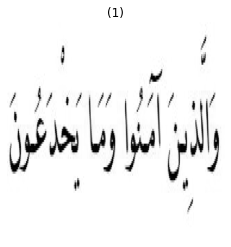

[[[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.6057029e+00]]

 [[ 2.7700000e+02  1.5882496e+00]]

 [[ 2.7500000e+02  1.5882496e+00]]

 [[-2.6600000e+02  3.1066861e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  1.6231562e+00]]

 [[ 2.9000000e+02  1.5358897e+00]]

 [[-4.4500000e+02  3.0892327e+00]]

 [[ 2.8000000e+02  1.5533431e+00]]

 [[-1.8400000e+02  3.1066861e+00]]

 [[ 2.5400000e+02  1.6406095e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  1.7453292e-02]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5184364e+00]]

 [[ 2.6800000e+02  1.6231562e+00]]

 [[ 2.8200000e+02  1.5184364e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.5000000e+02  1.6580628e+00]]

 [[-4.5300000e+02  3.1066861e+00]]

 [[-4.4900000e+02  3.1066861e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 2.5800000e+02  1.6406095

In [70]:
show_images([X_test[0]])
print("hehhhhh",get_max_vote(X_test[0]))
print("saaaa7",y_test[0])

In [71]:
test_values=[get_max_vote(img) for img in X_test]
print(test_values)
print(y_test.astype("int"))
correct=test_values==y_test
print(y_test[test_values!=y_test])
print("accuracy=",np.sum(correct)/correct.shape[0])

[[[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5533431e+00]]

 [[ 2.7200000e+02  1.6057029e+00]]

 [[ 2.7700000e+02  1.5882496e+00]]

 [[ 2.7500000e+02  1.5882496e+00]]

 [[-2.6600000e+02  3.1066861e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  1.6231562e+00]]

 [[ 2.9000000e+02  1.5358897e+00]]

 [[-4.4500000e+02  3.0892327e+00]]

 [[ 2.8000000e+02  1.5533431e+00]]

 [[-1.8400000e+02  3.1066861e+00]]

 [[ 2.5400000e+02  1.6406095e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  1.7453292e-02]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5184364e+00]]

 [[ 2.6800000e+02  1.6231562e+00]]

 [[ 2.8200000e+02  1.5184364e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.5000000e+02  1.6580628e+00]]

 [[-4.5300000e+02  3.1066861e+00]]

 [[-4.4900000e+02  3.1066861e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 2.5800000e+02  1.6406095

[245235    260    257      0    135   3461      0    262    255    135]
[3.]
[8 8 6]
[[[ 4.1200000e+02  6.9813170e-02]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.5500000e+02  1.7453292e-02]]

 [[ 4.0300000e+02  3.4906585e-02]]

 [[ 1.1600000e+02  1.7453292e-02]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.7500000e+02  3.6651915e-01]]

 [[ 2.9400000e+02  1.6231562e+00]]

 [[ 2.9800000e+02  1.6231562e+00]]

 [[ 2.9600000e+02  1.3962634e-01]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 4.7000000e+02  1.7453292e-02]]

 [[ 1.4500000e+02  3.4906585e-02]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 1.9300000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  1.5882496e+00]]

 [[ 1.1300000e+02  1.7453292e-02]]

 [[ 1.9000000e+01  3.4906585e-02]]

 [[ 2.9900000e+02  1.6057029e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 4.0600000e+02  5.2359879e-02]]

 [[ 2.9200000e+02  1.2217305e-01]]

 [[ 4.1600000e+02  8.7266460e-02]]

 [[-3.9100000e+02  3.1241393e+00]]

 [[ 1.6300000e+

[7.]
[238802    772   1820      0    164   5686      0    783   1776    197]
[8.]
[6.]
[243941    870    760      0    180   2439      0    873    760    177]
[3.]
[2 6 2]
[[[ 9.9000000e+01  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[-9.0000000e+01  3.1066861e+00]]

 [[ 2.7200000e+02  1.5707964e+00]]

 [[-9.3000000e+01  3.1066861e+00]]

 [[ 8.0000000e+01  0.0000000e+00]]

 [[ 1.3500000e+02  0.0000000e+00]]

 [[ 1.8800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[-9.5000000e+01  3.1241393e+00]]

 [[ 9.4000000e+01  0.0000000e+00]]

 [[ 2.8800000e+02  1.5707964e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 1.7100000e+02  0.0000000e+00]]

 [[ 1.0100000e+02  1.7453292e-02]]

 [[ 3.7800000e+02  5.2359879e-02]]

 [[ 9.4000000e+01  3.4906585e-02]]

 [[ 2.1600000e+02  2.6179940e-01]]

 [[ 3.7700000e+02  3.4906585e-02]]

 [[ 3.1700000e+02  0.0000000e+00]]



[246108    518    486      0    250   1384      0    524    494    236]
[1.]
[1 1 1]
[[[ 7.2000000e+01  0.0000000e+00]]

 [[ 2.9600000e+02  3.4906585e-02]]

 [[ 7.4000000e+01  0.0000000e+00]]

 [[ 3.0000000e+01  0.0000000e+00]]

 [[ 2.6800000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  3.4906585e-02]]

 [[ 2.4700000e+02  0.0000000e+00]]

 [[ 4.4100000e+02  0.0000000e+00]]

 [[ 4.1300000e+02  0.0000000e+00]]

 [[ 2.8000000e+02  3.4906585e-02]]

 [[ 2.9200000e+02  1.7453292e-02]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.7300000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.6600000e+02  5.2359879e-02]]

 [[ 2.4900000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  5.2359879e-02]]

 [[ 2.8400000e+02  6.9813170e-02]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.7100000e+02  6.9813170e-02]]

 [[ 4.4000000e+02  1.7453292e-02]]

 [[ 2.7200000e+02  1.7453292e-02]]

 [[ 4.0600000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  8.7266460e-02]]

 [[-4.0500000e+02  3.1241393e+00]]

 [[ 2.5300000e+

[243702    129   1868      0    127   2050      0    135   1862    127]
[8.]
[8 8 8]
[[[-4.4000000e+02  3.1241393e+00]]

 [[-4.8000000e+01  3.1066861e+00]]

 [[-2.6100000e+02  3.1066861e+00]]

 [[-1.3200000e+02  3.0892327e+00]]

 [[-2.3400000e+02  3.0892327e+00]]

 [[-2.3700000e+02  3.1066861e+00]]

 [[-4.4100000e+02  3.1066861e+00]]

 [[-3.3800000e+02  3.0717795e+00]]

 [[ 2.7400000e+02  7.8539819e-01]]

 [[ 3.3200000e+02  7.8539819e-01]]

 [[-3.4500000e+02  3.0892327e+00]]

 [[ 3.4900000e+02  7.8539819e-01]]

 [[-1.2800000e+02  3.0892327e+00]]

 [[-3.4100000e+02  3.0892327e+00]]

 [[-2.4300000e+02  3.1066861e+00]]

 [[ 2.6900000e+02  7.8539819e-01]]

 [[-1.3500000e+02  3.1066861e+00]]

 [[-4.3600000e+02  3.1066861e+00]]

 [[-5.8000000e+01  3.1241393e+00]]

 [[-4.5000000e+01  3.0892327e+00]]

 [[-2.8400000e+02  2.9496064e+00]]

 [[-1.2400000e+02  3.0717795e+00]]

 [[-2.6300000e+02  3.0892327e+00]]

 [[-2.5700000e+02  3.0892327e+00]]

 [[-5.3000000e+01  3.1066861e+00]]

 [[-3.4300000e+

[[[ 4.3400000e+02  1.5707964e+00]]

 [[ 1.1000000e+01  0.0000000e+00]]

 [[ 3.5900000e+02  0.0000000e+00]]

 [[ 2.6000000e+01  0.0000000e+00]]

 [[ 4.8900000e+02  0.0000000e+00]]

 [[ 6.9000000e+01  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 3.5000000e+01  1.5707964e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 1.0600000e+02  1.5707964e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 1.2700000e+02  0.0000000e+00]]

 [[ 3.4400000e+02  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.9200000e+02  1.5707964e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 7.6000000e+01  1.5707964e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 1.7800000e+02  1.5707964e+00]]

 [[ 1.4200000e+02  0.0000000e+00]]

 [[ 1.8500000e+02  0.0000000e+00]]

 [[ 2.4900000e+02  1.5707964

[240327    517    774      0    472   6147      0    513    782    468]
[4.]
[8 8 8]
[[[ 2.8100000e+02  5.9341192e-01]]

 [[ 2.3400000e+02  2.7925268e-01]]

 [[ 2.7500000e+02  5.4105204e-01]]

 [[ 2.1700000e+02  1.9198622e-01]]

 [[ 4.4100000e+02  7.8539819e-01]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 2.8200000e+02  6.1086524e-01]]

 [[ 3.3500000e+02  0.0000000e+00]]

 [[ 2.7700000e+02  5.5850536e-01]]

 [[ 1.1800000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  5.0614548e-01]]

 [[ 2.7300000e+02  5.0614548e-01]]

 [[ 2.7900000e+02  5.5850536e-01]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.1300000e+02  1.5707964e+00]]

 [[-9.6000000e+01  3.0717795e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.2100000e+02  5.2359879e-02]]

 [[ 4.1200000e+02  1.0821041e+00]]

 [[-1.0800000e+02  3.0892327e+00]]

 [[ 3.8800000e+02  1.2391838e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.0600000e+02  0.0000000e+00]]

 [[ 2.5400000e+

[246219     97   1119      0     89   1171      0     97   1117     91]
[8.]
[8 8 8]
[[[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.9700000e+02  0.0000000e+00]]

 [[ 1.7300000e+02  0.0000000e+00]]

 [[-4.2900000e+02  3.1066861e+00]]

 [[ 1.5300000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[-3.6900000e+02  3.0892327e+00]]

 [[-3.7200000e+02  3.1066861e+00]]

 [[-3.8100000e+02  3.1241393e+00]]

 [[ 3.9000000e+02  1.7453292e-02]]

 [[-4.2000000e+02  3.0892327e+00]]

 [[-4.3300000e+02  3.1241393e+00]]

 [[-3.7800000e+02  3.1066861e+00]]

 [[-2.8300000e+02  3.1241393e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[-4.2400000e+02  3.1066861e+00]]

 [[-2.7900000e+02  3.1066861e+00]]

 [[ 3.8500000e+02  0.0000000e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[-4.5100000e+02  3.1241393e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[-1.0500000e+

[245070    414    491      0    225   2673      0    419    480    228]
[3.]
[1 5 1]
[[[ 292.           1.3439035]]

 [[ 155.           0.       ]]

 [[ 288.           1.3613569]]

 ...

 [[ -36.           2.4260077]]

 [[-256.           2.8274333]]

 [[ -93.           3.0019662]]]
[7.]
[241648    561    944      0    169   5014      0    529   1002    133]
[3.]
[3.]
[245033    581    530      0    163   2420      0    591    523    159]
[3.]
[2 3 2]
[[[-416.           3.1241393]]

 [[-399.           3.1241393]]

 [[-470.           3.1241393]]

 ...

 [[-379.           3.0892327]]

 [[-304.           3.106686 ]]

 [[-273.           3.1241393]]]
[7.]
[224419   1324   1926      0   1076  16929      0   1290   2038    998]
[4.]
[4.]
[233301   1290   1679      0    896   8969      0   1292   1667    906]
[4.]
[4 4 1]
[[[ 2.9000000e+01  0.0000000e+00]]

 [[ 3.3400000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 2.8800000e+02  5.2359879e-01]]

 [[ 2.8600000e+02  5.0614548e-0

[243559    160   1995      0    147   1837      0    150   2005    147]
[8.]
[8 8 8]
[[[-1.0000000e+01  3.1241393e+00]]

 [[ 1.6000000e+01  0.0000000e+00]]

 [[-4.3800000e+02  3.1241393e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[-8.0000000e+00  3.1066861e+00]]

 [[ 4.4300000e+02  0.0000000e+00]]

 [[-1.3000000e+01  3.1241393e+00]]

 [[ 1.8000000e+01  1.7453292e-02]]

 [[-4.4100000e+02  3.1241393e+00]]

 [[-4.3600000e+02  3.1066861e+00]]

 [[-3.6900000e+02  2.9496064e+00]]

 [[ 1.3000000e+01  0.0000000e+00]]

 [[-5.0000000e+00  3.1066861e+00]]

 [[ 4.4800000e+02  1.7453292e-02]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 2.7000000e+01  5.2359879e-02]]

 [[-1.7300000e+02  3.1066861e+00]]

 [[ 4.5200000e+02  3.4906585e-02]]

 [[ 4.5300000e+02  1.7453292e-02]]

 [[ 2.9500000e+02  1.2217305e-01]]

 [[-1.0000000e+00  3.0019662e+00]]

 [[-3.0000000e+00  3.0892327e+00]]

 [[-4.3200000e+02  3.1066861e+00]]

 [[ 2.0000000e+01  1.7453292e-02]]

 [[-3.8100000e+

[245990    439    424      0    158   1968      0    438    424    159]
[1.]
[3 3 3]
[[[ 3.4600000e+02  1.5707964e+00]]

 [[ 3.4100000e+02  1.5707964e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 3.1700000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.6500000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 3.4800000e+02  1.5533431e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5533431e+00]]

 [[ 3.0000000e+02  1.5533431e+00]]

 [[ 3.0600000e+02  1.5882496e+00]]

 [[ 2.6100000e+02  1.5882496e+00]]

 [[ 1.4500000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5707964e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.1400000e+02  1.5533431e+00]]

 [[ 2.8300000e+02  1.5707964e+00]]

 [[ 2.9200000e+02  1.5882496e+00]]

 [[ 3.3900000e+02  1.5882496e+00]]

 [[-3.1600000e+02  3.1241393e+00]]

 [[ 2.6200000e+

[247769    261    334      0    150    741      0    262    330    153]
[1.]
[1 1 7]
[[[ 429.           0.       ]]

 [[ 417.           0.       ]]

 [[ 419.           0.       ]]

 ...

 [[ -30.           3.106686 ]]

 [[-132.           3.1241393]]

 [[ -53.           3.1241393]]]
[7.]
[232507    910   1844      0    570  10845      0    885   1901    538]
[4.]
[6.]
[239243    969   1099      0    448   5725      0    965   1093    458]
[4.]
[7 6 7]
[[[ 4.4300000e+02  0.0000000e+00]]

 [[ 4.4800000e+02  0.0000000e+00]]

 [[ 4.3800000e+02  0.0000000e+00]]

 [[ 4.4500000e+02  0.0000000e+00]]

 [[ 2.2700000e+02  0.0000000e+00]]

 [[ 4.1600000e+02  0.0000000e+00]]

 [[ 4.3500000e+02  0.0000000e+00]]

 [[ 2.2000000e+02  0.0000000e+00]]

 [[-4.4000000e+02  3.1241393e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 4.5000000e+02  1.7453292e-02]]

 [[ 4.4800000e+02  3.4906585e-02]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  6.9813170e-02]]

 [[ 4.4000000e+02  0.0000000e+00]]

 [[ 3

[7.]
[235299    887   1570      0    347   9125      0    854   1594    324]
[4.]
[3.]
[241220    849    953      0    298   4578      0    848    953    301]
[4.]
[0 3 0]
[[[ 2.7500000e+02  1.5707964e+00]]

 [[ 9.3000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 8.9000000e+01  0.0000000e+00]]

 [[ 1.4100000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 2.9200000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.4000000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  0.0000000e+00]]

 [[ 2.6700000e+02  1.5882496e+00]]

 [[ 1.0900000e+02  0.0000000e+00]]

 [[ 9.6000000e+01  0.0000000e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 2.6500000e+02  1.6057029e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 1.0500000e+02  0.0000000e+00]]

 [[ 2.5200000e+02  1.5707964e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 2.3500000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]



 [[-4.0200000e+02  3.1241393e+00]]]
[7.]
[231828   1363   2009      0   1000   9428      0   1345   2036    991]
[4.]
[3.]
[238960   1237   1283      0    680   4640      0   1232   1289    679]
[4.]
[4 3 2]
[[[ 4.8400000e+02  0.0000000e+00]]

 [[ 4.7400000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  1.5707964e+00]]

 [[ 1.2900000e+02  1.5707964e+00]]

 [[ 8.7000000e+01  1.5707964e+00]]

 [[ 3.3000000e+01  1.5707964e+00]]

 [[ 2.2600000e+02  1.5707964e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.1900000e+02  1.5707964e+00]]

 [[ 3.7700000e+02  1.5707964e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 3.2300000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  0.0000000e+00]]

 [[ 4.1200000e+02  0.0000000e+00]]

 [[ 3.7400000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 3.4200000e+02  0.0000000e+00]]

 [[ 2.3000000e+01  1.7453292e-02]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]



[3.]
[2 5 0]
[[[ 1.3400000e+02  0.0000000e+00]]

 [[ 1.3700000e+02  6.9813170e-02]]

 [[ 1.4100000e+02  8.7266460e-02]]

 ...

 [[-2.0900000e+02  3.0717795e+00]]

 [[-1.7200000e+02  3.1241393e+00]]

 [[-1.0000000e+02  3.1241393e+00]]]
[7.]
[231528   1241   1011      0    380  13216      0   1172   1065    387]
[4.]
[6.]
[236670    827   1250      0    297   8578      0    830   1258    290]
[4.]
[0 6 6]
[[[ 2.4000000e+01  0.0000000e+00]]

 [[ 4.5500000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  1.5707964e+00]]

 [[ 2.1000000e+01  0.0000000e+00]]

 [[ 4.5800000e+02  0.0000000e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.1800000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[ 3.2700000e+02  1.5707964e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[ 2.8600000e+02  7.8539819e-01]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[ 4.2600000e+02  7.8539819e-01]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 4.6100000e+02  0.0000000e+00]]

 [[ 3.2100000e+02

 [[-2.8700000e+02  3.1241393e+00]]]
[6.]
[239438    567    997      0    170   7114      0    554   1025    135]
[0.]
[7.]
[243617    652    655      0    205   3363      0    651    649    208]
[4.]
[3 7 4]
[[[ 4.5900000e+02  0.0000000e+00]]

 [[ 1.1200000e+02  0.0000000e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[ 2.9300000e+02  0.0000000e+00]]

 [[ 3.7200000e+02  1.5707964e+00]]

 [[ 7.6000000e+01  0.0000000e+00]]

 [[ 1.5000000e+01  0.0000000e+00]]

 [[ 1.0800000e+02  0.0000000e+00]]

 [[ 7.0000000e+01  0.0000000e+00]]

 [[ 1.0600000e+02  0.0000000e+00]]

 [[ 3.4100000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5707964e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  1.5707964e+00]]

 [[ 1.5700000e+02  0.0000000e+00]]

 [[ 4.5600000e+02  0.0000000e+00]]

 [[ 1.4900000e+02  0.0000000e+00]]

 [[ 4.5200000e+02  0.0000000e+00]]

 [[-3.4000000e+02  3.1066861e+00]]

 [[ 2.6400000e+02  0.0000000e+00]]

 [[ 1.5700000e+02  5.2359879e-02]]

 [[ 3.6500000e+02  1.5707964e+00]]



[245540    384    410      0    123   2626      0    390    402    125]
[3.]
[2 3 0]
[[[  43.           0.       ]]

 [[ 201.           0.       ]]

 [[ 204.           0.       ]]

 ...

 [[   3.           3.106686 ]]

 [[-268.           3.1241393]]

 [[   0.           3.1241393]]]
[7.]
[235210    654   1046      0    348  10712      0    646   1032    352]
[4.]
[3.]
[240850    555    789      0    293   5882      0    552    779    300]
[4.]
[0 3 0]
[[[249.          1.5707964]]

 [[234.          1.5707964]]

 [[241.          1.5707964]]

 [[226.          1.5707964]]

 [[302.          1.5707964]]

 [[116.          0.       ]]

 [[113.          0.       ]]

 [[120.          0.       ]]

 [[294.          1.5707964]]

 [[287.          1.5707964]]

 [[ 94.          0.       ]]

 [[ 90.          0.       ]]

 [[ 86.          0.       ]]

 [[ 63.          0.       ]]

 [[211.          1.5707964]]

 [[ 67.          0.       ]]

 [[219.          1.5707964]]

 [[ 60.          0.       ]]

 [[ 9

 [[-54.          3.106686 ]]]
[7.]
[235711    552   1257      0    333  10071      0    548   1191    337]
[4.]
[3.]
[241641    622    753      0    406   4795      0    621    755    407]
[4.]
[0 3 0]
[[[332.          1.5707964]]

 [[479.          1.5707964]]

 [[429.          1.5707964]]

 [[158.          1.5707964]]

 [[449.          1.5707964]]

 [[478.          0.       ]]

 [[ 12.          1.5707964]]

 [[ 20.          0.       ]]

 [[ 62.          1.5707964]]

 [[139.          1.5707964]]

 [[351.          1.5707964]]

 [[ 42.          1.5707964]]

 [[188.          1.5707964]]

 [[297.          0.       ]]

 [[ 91.          1.5707964]]

 [[109.          1.5707964]]

 [[339.          0.       ]]

 [[269.          0.       ]]

 [[436.          0.       ]]

 [[ 62.          0.       ]]

 [[235.          1.5707964]]

 [[206.          1.5707964]]

 [[256.          1.5707964]]

 [[365.          0.       ]]

 [[201.          0.       ]]

 [[302.          1.5707964]]

 [[130.          0

 [[-3.5800000e+02  3.1241393e+00]]]
[0.]
[242952    361   1017      0    128   4036      0    347   1051    108]
[1.]
[3.]
[246109    495    450      0    181   1639      0    499    438    189]
[1.]
[3 3 3]
[[[ 3.2600000e+02  1.5707964e+00]]

 [[ 3.2000000e+02  1.5707964e+00]]

 [[ 2.9500000e+02  1.5707964e+00]]

 [[ 4.7500000e+02  0.0000000e+00]]

 [[ 3.7300000e+02  0.0000000e+00]]

 [[ 4.7200000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 4.6300000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  0.0000000e+00]]

 [[ 4.6500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 3.3400000e+02  1.5358897e+00]]

 [[ 3.3000000e+02  1.5533431e+00]]

 [[ 3.2700000e+02  1.5533431e+00]]

 [[ 3.1600000e+02  1.5882496e+00]]

 [[ 2.8400000e+02  3.6651915e-01]]

 [[ 3.0300000e+02  1.5358897e+00]]

 [[ 2.8500000e+02  1.5882496e+00]]

 [[ 2.5800000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  1.5882496e+00]]

 [[ 3.1800000e+02  1.5882496e+00]]



[239537    849   1077      0    468   5679      0    816   1115    459]
[3.]
[3.]
[241806    688   1156      0    405   3698      0    690   1140    417]
[4.]
[0 3 0]
[[[ 4.4200000e+02  1.5707964e+00]]

 [[ 2.9600000e+02  0.0000000e+00]]

 [[ 3.9500000e+02  0.0000000e+00]]

 [[ 1.5400000e+02  0.0000000e+00]]

 [[ 4.0000000e+00  0.0000000e+00]]

 [[ 1.3700000e+02  0.0000000e+00]]

 [[ 1.4700000e+02  0.0000000e+00]]

 [[ 3.7800000e+02  0.0000000e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 3.8600000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 3.5500000e+02  0.0000000e+00]]

 [[ 2.8900000e+02  0.0000000e+00]]

 [[ 1.9700000e+02  0.0000000e+00]]

 [[ 3.6200000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 1.3000000e+02  0.0000000e+00]]

 [[ 5.6000000e+01  1.5707964e+00]]

 [[ 4.9600000e+02  0.0000000e+00]]

 [[ 3.6300000e+02  1.5707964e+00]]

 [[ 3.1300000e+02  0.0000000e+00]]

 [[ 1.6300000e+02  0.0000000e+00]]

 [[ 3.2000000e+02  0.0000000e+00]]

 [[ 1

[246307    461    427      0     95   1727      0    461    427     95]
[1.]
[3 6 2]
[[[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 2.9400000e+02  0.0000000e+00]]

 [[ 2.9700000e+02  0.0000000e+00]]

 [[ 8.7000000e+01  0.0000000e+00]]

 [[ 2.8400000e+02  1.5707964e+00]]

 [[ 1.1000000e+02  0.0000000e+00]]

 [[ 1.7200000e+02  0.0000000e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.9100000e+02  0.0000000e+00]]

 [[ 1.1300000e+02  0.0000000e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.7700000e+02  0.0000000e+00]]

 [[ 2.6000000e+02  1.5882496e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[ 2.7000000e+02  1.5533431e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 8.4000000e+01  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 2.7300000e+02  1.5707964e+00]]

 [[ 2.5700000e+02  1.5707964e+00]]

 [[ 2.8000000e+01  0.0000000e+00]]

 [[ 2.5500000e+02  1.5882496e+00]]

 [[ 1.0700000e+02  0.0000000e+00]]

 [[ 2.4100000e+02  1.5707964e+00]]

 [[ 2.5200000e+

[245883    285    593      0    166   2029      0    271    613    160]
[1.]
[6 6 6]
[[[ 2.9600000e+02  1.5707964e+00]]

 [[ 2.9100000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  0.0000000e+00]]

 [[-3.4000000e+02  3.1066861e+00]]

 [[ 3.1200000e+02  1.5707964e+00]]

 [[ 4.2500000e+02  0.0000000e+00]]

 [[ 4.2300000e+02  0.0000000e+00]]

 [[ 3.3700000e+02  0.0000000e+00]]

 [[-4.1900000e+02  3.1241393e+00]]

 [[ 2.9600000e+02  1.5184364e+00]]

 [[ 2.9200000e+02  1.5533431e+00]]

 [[ 2.9800000e+02  1.5533431e+00]]

 [[-3.3900000e+02  3.0892327e+00]]

 [[ 1.8000000e+02  1.7453292e-02]]

 [[ 1.8700000e+02  3.4906585e-02]]

 [[ 3.1300000e+02  1.5184364e+00]]

 [[ 3.1800000e+02  1.4660766e+00]]

 [[ 2.8000000e+02  1.6057029e+00]]

 [[ 3.0000000e+02  1.5009831e+00]]

 [[ 2.8800000e+02  1.5882496e+00]]

 [[-3.3000000e+02  3.0717795e+00]]

 [[-3.3500000e+02  3.0892327e+00]]

 [[ 2.9300000e+02  1.5358897e+00]]

 [[ 3.0500000e+02  1.5358897e+00]]

 [[ 2.8600000e+02  1.5882496e+00]]

 [[ 2.2000000e+

 [[ 2.7800000e+02  1.7278759e+00]]]
[7.]
[240723    616    868      0    270   5769      0    612    912    230]
[3.]
[2.]
[244276    526    633      0    254   2898      0    533    631    249]
[3.]
[0 2 3]
[[[324.          1.5707964]]

 [[320.          1.5707964]]

 [[322.          1.5707964]]

 [[318.          1.5882496]]

 [[327.          1.553343 ]]

 [[308.          1.6057029]]

 [[330.          1.5358897]]

 [[310.          1.6057029]]

 [[312.          1.6057029]]

 [[332.          1.5358897]]

 [[334.          1.5358897]]

 [[333.          1.5184364]]

 [[264.          1.5707964]]

 [[301.          1.6231562]]

 [[297.          1.6406095]]

 [[304.          1.6231562]]]
[4.]
[245454    571    722      0    205   1550      0    579    698    221]
[1.]
[3.]
[247202    380    443      0    164    824      0    378    439    170]
[1.]
[0 3 0]
[[[ 2.3400000e+02  1.5707964e+00]]

 [[ 2.8500000e+02  0.0000000e+00]]

 [[ 1.6700000e+02  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00

[245343    491    460      0    172   2411      0    494    462    167]
[3.]
[3 3 3]
[[[ 3.9900000e+02  1.5358897e+00]]

 [[ 3.9500000e+02  1.5533431e+00]]

 [[ 4.0100000e+02  1.5358897e+00]]

 [[ 3.2300000e+02  0.0000000e+00]]

 [[ 3.9000000e+02  1.3962634e+00]]

 [[ 3.8100000e+02  1.4486233e+00]]

 [[ 3.9200000e+02  1.3788100e+00]]

 [[ 3.3300000e+02  0.0000000e+00]]

 [[ 3.9200000e+02  1.5707964e+00]]

 [[-3.2900000e+02  3.1241393e+00]]

 [[-3.2500000e+02  3.1066861e+00]]

 [[ 3.8800000e+02  1.4137167e+00]]

 [[-2.2900000e+02  3.1066861e+00]]

 [[ 3.9900000e+02  1.3613569e+00]]

 [[ 3.8400000e+02  1.4137167e+00]]

 [[ 3.7900000e+02  1.4835298e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 4.0000000e+02  1.3788100e+00]]

 [[ 3.9800000e+02  1.3962634e+00]]

 [[ 3.7900000e+02  1.4486233e+00]]

 [[ 3.7700000e+02  1.4660766e+00]]

 [[ 3.8100000e+02  1.5882496e+00]]

 [[ 3.8400000e+02  1.4486233e+00]]

 [[ 3.7200000e+02  1.5009831e+00]]

 [[ 4.0500000e+02  1.5184364e+00]]

 [[ 3.9700000e+

[237727   1136   1305      0    732   5927      0   1130   1308    735]
[4.]
[4 4 4]
[[[ 1.0800000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 3.2500000e+02  0.0000000e+00]]

 [[ 3.3000000e+02  0.0000000e+00]]

 [[ 2.0700000e+02  0.0000000e+00]]

 [[ 2.7800000e+02  0.0000000e+00]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[ 2.3600000e+02  0.0000000e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 3.5300000e+02  0.0000000e+00]]

 [[ 1.1100000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  0.0000000e+00]]

 [[ 2.3900000e+02  0.0000000e+00]]

 [[ 1.0600000e+02  0.0000000e+00]]

 [[ 2.0200000e+02  0.0000000e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 4.2100000e+02  0.0000000e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.1000000e+02  0.0000000e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 2.7500000e+02  0.0000000e+00]]

 [[-3.6700000e+02  3.1066861e+00]]

 [[ 1.2000000e+

[239104   1033   1058      0    617   5480      0   1045   1038    625]
[4.]
[4 4 5]
[[[ 3.6900000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  0.0000000e+00]]

 [[ 6.7000000e+01  0.0000000e+00]]

 [[ 3.6400000e+02  0.0000000e+00]]

 [[ 6.2000000e+01  0.0000000e+00]]

 [[ 3.0100000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-3.6300000e+02  3.1241393e+00]]

 [[ 3.7700000e+02  4.3633232e-01]]

 [[ 3.6600000e+02  0.0000000e+00]]

 [[-1.7800000e+02  3.0892327e+00]]

 [[ 3.1700000e+02  1.5707964e+00]]

 [[-6.4000000e+01  3.1066861e+00]]

 [[ 1.7800000e+02  0.0000000e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 3.6300000e+02  1.9198622e-01]]

 [[ 2.9900000e+02  0.0000000e+00]]

 [[ 3.7100000e+02  2.2689280e-01]]

 [[ 3.2000000e+02  1.5184364e+00]]

 [[-1.7500000e+02  3.0717795e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 7.2000000e+01  1.7453292e-02]]

 [[ 3.7900000e+02  4.0142572e-01]]

 [[ 2.8000000e+

[236170    965   1600      0    787   7119      0    962   1603    794]
[4.]
[7 8 7]
[[[ 284.           0.       ]]

 [[ 354.           0.       ]]

 [[ 107.           0.       ]]

 ...

 [[-113.           3.0892327]]

 [[ -46.           3.0892327]]

 [[  -3.           3.106686 ]]]
[7.]
[231632    563    974      0    409  14474      0    589    986    373]
[4.]
[3.]
[239122    513    728      0    368   7661      0    514    719    375]
[4.]
[0 3 2]
[[[ 129.           0.       ]]

 [[ 343.           0.       ]]

 [[ 213.           0.       ]]

 ...

 [[-232.           3.0892327]]

 [[ -36.           3.0892327]]

 [[-200.           3.1241393]]]
[0.]
[247625     50    613      0     53    943      0     50    611     55]
[1.]
[6.]
[249345     16    114      0     47    301      0     16    114     47]
[1.]
[7 6 1]
[[[ 1.3300000e+02  1.2217305e-01]]

 [[ 1.3800000e+02  1.3962634e-01]]

 [[-2.4300000e+02  3.0892327e+00]]

 [[ 1.3600000e+02  1.2217305e-01]]

 [[ 1.2900000e+02  0.0000000e+0

[239584    356    958      0    224   7340      0    182   1170    186]
[0.]
[6.]
[244197    342    480      0    319   3521      0    350    472    319]
[0.]
[6 6 6]
[[[-3.4400000e+02  3.1241393e+00]]

 [[-2.5600000e+02  3.1241393e+00]]

 [[ 3.8200000e+02  2.0943952e-01]]

 [[-2.2400000e+02  3.1066861e+00]]

 [[-4.5900000e+02  3.1241393e+00]]

 [[-4.7400000e+02  3.1066861e+00]]

 [[-2.5700000e+02  3.1066861e+00]]

 [[-2.2000000e+02  3.1066861e+00]]

 [[-1.4000000e+01  3.1241393e+00]]

 [[-4.5500000e+02  3.1066861e+00]]

 [[-4.6200000e+02  3.1241393e+00]]

 [[-2.5300000e+02  2.9146998e+00]]

 [[-4.7900000e+02  3.1066861e+00]]

 [[-1.2000000e+01  3.1241393e+00]]

 [[ 3.5000000e+02  0.0000000e+00]]

 [[ 2.3000000e+02  0.0000000e+00]]

 [[-1.0000000e+01  3.1066861e+00]]

 [[ 2.6000000e+02  0.0000000e+00]]

 [[-2.5300000e+02  3.1066861e+00]]

 [[-3.4700000e+02  3.1241393e+00]]

 [[-2.6000000e+02  3.1241393e+00]]

 [[ 3.7800000e+02  2.0943952e-01]]

 [[-1.2400000e+02  3.1066861e+00]]

 [[ 1

 [[9.0000000e+01 2.1642082e+00]]]
[7.]
[241143    655   1728      0    301   3489      0    648   1750    286]
[1.]
[3.]
[245457    613    742      0    193   1447      0    616    734    198]
[1.]
[0 3 0]
[[[-2.2000000e+02  3.1241393e+00]]

 [[ 2.3000000e+02  1.7453292e-02]]

 [[ 1.0000000e+02  0.0000000e+00]]

 ...

 [[-4.4700000e+02  3.1066861e+00]]

 [[-2.1300000e+02  3.1066861e+00]]

 [[-4.3900000e+02  3.1241393e+00]]]
[7.]
[226539    599   1645      0    480  18013      0    618   1637    469]
[4.]
[4.]
[236656    686    953      0    452   9162      0    693    941    457]
[4.]
[0 4 0]
[[[  94.           0.       ]]

 [[  90.           0.       ]]

 [[ 324.           0.       ]]

 ...

 [[ -63.           3.0892327]]

 [[-296.           3.106686 ]]

 [[-103.           3.1241393]]]
[0.]
[242288    222   1252      0     78   4658      0    232   1230     40]
[3.]
[3.]
[245901    557    425      0    153   1829      0    561    423    151]
[1.]
[3 3 3]
[[[ 179.           0.       ]]

 [[-2.2500000e+02  3.1241393e+00]]]
[0.]
[243321    152    950      0    168   4133      0    141    968    167]
[1.]
[7.]
[246387    232    380      0    247   1893      0    233    382    246]
[1.]
[5 7 5]
[[[   2.           0.       ]]

 [[  86.           0.       ]]

 [[ 133.           0.       ]]

 ...

 [[-385.           3.0717795]]

 [[-338.           3.0892327]]

 [[-475.           3.1241393]]]
[7.]
[234818    630   2533      0    407   8034      0    616   2591    371]
[4.]
[6.]
[241846    885    945      0    408   3678      0    873    962    403]
[4.]
[7 6 7]
[[[ 4.3700000e+02  0.0000000e+00]]

 [[ 3.8800000e+02  0.0000000e+00]]

 [[ 3.1200000e+02  0.0000000e+00]]

 [[ 4.3900000e+02  0.0000000e+00]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 2.9300000e+02  1.5707964e+00]]

 [[ 3.8200000e+02  0.0000000e+00]]

 [[ 2.7600000e+02  1.5707964e+00]]

 [[ 2.3300000e+02  0.0000000e+00]]

 [[ 1.3800000e+02  0.0000000e+00]]

 [[ 2.9400000e+02  1.5533431e+00]]

 [[ 2.8800000e+02  1.57079

[242963    299    711      0    230   4557      0    177    851    212]
[3.]
[1.]
[245333    341    521      0    311   2321      0    338    519    316]
[3.]
[6 1 6]
[[[2.        1.5707964]]]
[8.]
[245642    287    587      0    114   2382      0    288    611     89]
[1.]
[3.]
[247486    290    307      0     95   1130      0    301    293     98]
[1.]
[3 3 0]
[[[ 2.8100000e+02  1.5707964e+00]]

 [[ 2.8600000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  1.5707964e+00]]

 [[ 2.5000000e+01  0.0000000e+00]]

 [[ 2.7500000e+02  1.5707964e+00]]

 [[ 2.9800000e+02  1.5707964e+00]]

 [[ 2.2000000e+01  0.0000000e+00]]

 [[ 2.9000000e+01  0.0000000e+00]]

 [[ 2.6900000e+02  1.5707964e+00]]

 [[ 2.6300000e+02  1.5707964e+00]]

 [[ 2.8000000e+02  1.5882496e+00]]

 [[ 2.8800000e+02  1.5533431e+00]]

 [[ 2.4600000e+02  1.5707964e+00]]

 [[ 1.9000000e+01  0.0000000e+00]]

 [[ 2.7800000e+02  1.5882496e+00]]

 [[ 9.8000000e+01  0.0000000e+00]]

 [[ 2.7400000e+02  1.5882496e+00]]

 [[ 2.1000000e+02  0.00

[241962    767    737      0    254   4546      0    782    735    217]
[3.]
[3.]
[244090    700    756      0    347   2311      0    728    724    344]
[3.]
[3 3 3]
[[[ 1.0600000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 1.8400000e+02  0.0000000e+00]]

 [[ 1.9000000e+02  0.0000000e+00]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 2.7000000e+02  1.5533431e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  3.4906585e-02]]

 [[ 1.8600000e+02  0.0000000e+00]]

 [[ 2.5600000e+02  0.0000000e+00]]

 [[ 3.0700000e+02  1.5707964e+00]]

 [[ 2.6700000e+02  1.5707964e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 1.3200000e+02  0.0000000e+00]]

 [[ 2.1900000e+02  0.0000000e+00]]

 [[ 1.9100000e+02  1.7453292e-02]]

 [[ 1.9300000e+02  1.7453292e-02]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 4.5000000e+01  0.0000000e+00]]

 [[ 2.5300000e+02  0.0000000e+00]]

 [[-1.8100000e+02  3.1241393e+00]]

 [[ 1.9200000e+02  0.0000000e+00]]

 [[-2

[244068    275   1136      0     93   2924      0    273   1156     75]
[1.]
[7.]
[246564    460    442      0    129   1374      0    465    434    132]
[1.]
[3 7 1]
[[[ 4.4000000e+02  1.5707964e+00]]

 [[ 9.9000000e+01  0.0000000e+00]]

 [[ 8.0000000e+00  0.0000000e+00]]

 [[ 4.8200000e+02  0.0000000e+00]]

 [[ 3.9100000e+02  0.0000000e+00]]

 [[ 3.2000000e+01  0.0000000e+00]]

 [[ 1.2100000e+02  0.0000000e+00]]

 [[ 2.3400000e+02  0.0000000e+00]]

 [[ 3.7000000e+02  0.0000000e+00]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 2.5700000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  0.0000000e+00]]

 [[ 2.1100000e+02  0.0000000e+00]]

 [[ 2.8100000e+02  0.0000000e+00]]

 [[ 1.4400000e+02  0.0000000e+00]]

 [[ 3.5900000e+02  1.5707964e+00]]

 [[ 7.5000000e+01  0.0000000e+00]]

 [[ 4.5900000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  1.5707964e+00]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 3.7000000e+01  1.5707964e+00]]

 [[ 1.6600000e+02  0.0000000e+00]]

 [[ 3.2400000e+02  0.0000000e+00]]

 [[ 1

[242090    934   1136      0    631   2508      0    939   1124    638]
[8.]
[4 4 7]
[[[ 8.4000000e+01  0.0000000e+00]]

 [[ 3.3000000e+01  3.4906585e-02]]

 [[ 8.1000000e+01  0.0000000e+00]]

 ...

 [[-4.4500000e+02  3.0892327e+00]]

 [[-4.3000000e+02  3.0892327e+00]]

 [[-3.2700000e+02  3.1066861e+00]]]
[7.]
[236556    800   1392      0    374   8312      0    754   1426    386]
[4.]
[6.]
[241587    708    924      0    267   4615      0    713    915    271]
[4.]
[0 6 0]
[[[ 4.1200000e+02  0.0000000e+00]]

 [[ 4.6000000e+01  1.7453292e-02]]

 [[ 2.0300000e+02  0.0000000e+00]]

 [[ 4.3000000e+02  5.2359879e-02]]

 [[ 4.2000000e+01  0.0000000e+00]]

 [[ 1.4600000e+02  3.4906585e-02]]

 [[ 4.2500000e+02  3.4906585e-02]]

 [[ 2.5000000e+02  4.3633232e-01]]

 [[ 3.9500000e+02  7.8539819e-01]]

 [[ 1.3400000e+02  3.3161256e-01]]

 [[ 4.4200000e+02  1.0471976e-01]]

 [[ 2.5700000e+02  4.5378560e-01]]

 [[ 4.1500000e+02  0.0000000e+00]]

 [[ 4.4700000e+02  2.2689280e-01]]

 [[ 1.2900000e+02

 [[-3.1300000e+02  3.1066861e+00]]]
[6.]
[241570    324    927      0    229   5456      0    301    975    218]
[3.]
[1.]
[245348    387    453      0    227   2512      0    394    449    230]
[3.]
[5 1 0]
[[[ 2.2700000e+02  0.0000000e+00]]

 [[ 2.3200000e+02  0.0000000e+00]]

 [[ 2.4300000e+02  0.0000000e+00]]

 [[ 2.1500000e+02  0.0000000e+00]]

 [[ 4.1400000e+02  1.5707964e+00]]

 [[ 4.1700000e+02  1.5707964e+00]]

 [[ 3.8300000e+02  1.5707964e+00]]

 [[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.8800000e+02  1.5707964e+00]]

 [[ 2.6900000e+02  0.0000000e+00]]

 [[ 4.0000000e+01  0.0000000e+00]]

 [[ 4.0900000e+02  1.5882496e+00]]

 [[ 3.8900000e+02  1.5533431e+00]]

 [[-2.2500000e+02  3.1241393e+00]]

 [[ 2.3400000e+02  1.7453292e-02]]

 [[ 4.3000000e+02  0.0000000e+00]]

 [[ 3.6900000e+02  1.5707964e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 2.0500000e+02  0.0000000e+00]]

 [[ 1.5100000e+02  0.0000000e+00]]

 [[ 3.8400000e+02  1.5533431e+00]]

 [[ 3.8600000e+02  1.5533431e+00]]



[245191     77   1616      0     81   1261      0     79   1614     81]
[8.]
[8 8 8]
[[[  49.           0.       ]]

 [[ 491.           0.       ]]

 [[ 489.           0.       ]]

 ...

 [[ -18.           3.106686 ]]

 [[-353.           3.1241393]]

 [[ -57.           3.1241393]]]
[7.]
[233909    637   2074      0    405   9873      0    625   2100    377]
[4.]
[3.]
[241086    902    899      0    387   4540      0    916    873    397]
[4.]
[7 3 7]
[[[-1.5800000e+02  3.0892327e+00]]

 [[-2.6200000e+02  3.0892327e+00]]

 [[-1.8300000e+02  3.0892327e+00]]

 [[-2.5800000e+02  3.0717795e+00]]

 [[-7.5000000e+01  3.1066861e+00]]

 [[-3.8000000e+02  3.1066861e+00]]

 [[-1.6200000e+02  3.0892327e+00]]

 [[-7.1000000e+01  3.0892327e+00]]

 [[ 2.4300000e+02  1.7453292e-02]]

 [[-1.8700000e+02  3.0892327e+00]]

 [[-8.0000000e+01  3.1066861e+00]]

 [[-7.6000000e+01  3.0892327e+00]]

 [[-1.7800000e+02  3.0717795e+00]]

 [[ 3.1800000e+02  6.4577180e-01]]

 [[-2.7400000e+02  3.0194197e+00]]

 [[ 1

[241613    226   1699      0     91   4355      0    231   1696     89]
[4.]
[7 5 7]
[[[ 2.9800000e+02  1.7453292e-02]]

 [[ 3.6400000e+02  1.5707964e+00]]

 [[ 3.0600000e+02  1.5707964e+00]]

 ...

 [[-2.8900000e+02  3.0543261e+00]]

 [[-1.8600000e+02  3.1066861e+00]]

 [[-2.0000000e+01  3.1066861e+00]]]
[7.]
[239015    635    986      0    263   7221      0    591   1037    252]
[0.]
[6.]
[243301    607    655      0    240   3697      0    610    653    237]
[4.]
[0 6 0]
[[[ 2.7300000e+02  0.0000000e+00]]

 [[ 6.0000000e+01  0.0000000e+00]]

 [[ 4.5000000e+02  0.0000000e+00]]

 [[ 2.8200000e+02  3.4906585e-02]]

 [[ 5.5000000e+01  0.0000000e+00]]

 [[ 6.5000000e+01  1.7453292e-02]]

 [[ 5.3000000e+01  0.0000000e+00]]

 [[ 4.2700000e+02  0.0000000e+00]]

 [[ 3.1000000e+02  3.4906585e-02]]

 [[ 3.1600000e+02  3.4906585e-02]]

 [[ 2.7000000e+02  0.0000000e+00]]

 [[ 4.3200000e+02  1.7453292e-02]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 4.2900000e+02

 [[ 2.6900000e+02  1.7453292e-02]]]
[8.]
[242119    102   1768      0    104   3933      0     85   1810     79]
[1.]
[8.]
[245524    201    722      0    262   2106      0    191    738    256]
[1.]
[8 8 8]
[[[ 2.6600000e+02  0.0000000e+00]]

 [[ 4.4400000e+02  0.0000000e+00]]

 [[ 4.5100000e+02  0.0000000e+00]]

 [[ 3.7600000e+02  1.5707964e+00]]

 [[ 3.7300000e+02  1.5707964e+00]]

 [[ 3.2100000e+02  0.0000000e+00]]

 [[ 2.5900000e+02  0.0000000e+00]]

 [[ 2.6100000e+02  0.0000000e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 2.5100000e+02  0.0000000e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 2.7700000e+02  0.0000000e+00]]

 [[ 4.3300000e+02  0.0000000e+00]]

 [[ 3.3200000e+02  0.0000000e+00]]

 [[ 3.4600000e+02  1.5707964e+00]]

 [[ 1.2900000e+02  0.0000000e+00]]

 [[ 3.7900000e+02  1.5533431e+00]]

 [[ 3.7000000e+02  1.5882496e+00]]

 [[ 3.8300000e+02  1.5533431e+00]]

 [[ 4.3600000e+02  0.0000000e+00]]

 [[ 3.8000000e+02  1.5707964e+00]]

 [[-2.5500000e+02  3.1241393e+00]]



[244714    404    548      0    253   2876      0    415    534    256]
[3.]
[1 1 1]
[[[-2.5500000e+02  3.0892327e+00]]

 [[-2.6900000e+02  3.1241393e+00]]

 [[ 3.2200000e+02  1.5707964e+00]]

 [[-2.8000000e+02  3.1241393e+00]]

 [[-2.7500000e+02  3.1241393e+00]]

 [[-3.1000000e+02  3.1066861e+00]]

 [[-4.5200000e+02  3.1241393e+00]]

 [[-4.5600000e+02  3.1241393e+00]]

 [[-2.4200000e+02  3.0543261e+00]]

 [[-5.6000000e+01  3.1066861e+00]]

 [[-4.0800000e+02  3.1241393e+00]]

 [[ 3.7900000e+02  0.0000000e+00]]

 [[ 3.0000000e+02  1.5707964e+00]]

 [[ 1.9500000e+02  0.0000000e+00]]

 [[ 1.8300000e+02  1.7453292e-02]]

 [[-2.2900000e+02  3.0194197e+00]]

 [[ 6.6000000e+01  0.0000000e+00]]

 [[-2.4900000e+02  3.0717795e+00]]

 [[-1.7100000e+02  3.1066861e+00]]

 [[ 3.8300000e+02  0.0000000e+00]]

 [[-3.1500000e+02  3.1241393e+00]]

 [[ 2.8400000e+02  0.0000000e+00]]

 [[ 3.2200000e+02  1.7453292e-02]]

 [[ 4.6000000e+02  0.0000000e+00]]

 [[-3.0700000e+02  3.1066861e+00]]

 [[-2.6400000e+

[245941    310    451      0    281   1975      0    311    447    284]
[1.]
[6 6 6]
[[[480.          1.5707964]]

 [[484.          0.       ]]

 [[458.          0.       ]]

 [[160.          0.       ]]

 [[186.          0.       ]]

 [[454.          1.5707964]]

 [[210.          0.       ]]

 [[183.          1.5707964]]

 [[330.          1.5707964]]

 [[136.          0.       ]]

 [[356.          1.5707964]]

 [[ 12.          0.       ]]

 [[ 10.          1.5707964]]

 [[ 34.          1.5707964]]

 [[434.          0.       ]]

 [[430.          1.5707964]]

 [[380.          1.5707964]]

 [[234.          0.       ]]

 [[404.          1.5707964]]

 [[207.          1.5707964]]

 [[ 36.          0.       ]]

 [[110.          0.       ]]

 [[334.          0.       ]]

 [[306.          1.5707964]]

 [[157.          1.5707964]]

 [[107.          1.5707964]]

 [[260.          0.       ]]

 [[280.          1.5707964]]

 [[ 57.          1.5707964]]

 [[257.          1.5707964]]

 [[360.        

[[[ 3.1000000e+01  0.0000000e+00]]

 [[ 3.5800000e+02  0.0000000e+00]]

 [[ 3.6400000e+02  3.4906585e-02]]

 [[-2.7000000e+01  3.1241393e+00]]

 [[ 1.6200000e+02  0.0000000e+00]]

 [[-3.5700000e+02  3.1241393e+00]]

 [[-3.0900000e+02  3.1241393e+00]]

 [[-3.5300000e+02  3.1241393e+00]]

 [[-3.1300000e+02  3.1241393e+00]]

 [[ 3.1400000e+02  0.0000000e+00]]

 [[-1.5800000e+02  3.1241393e+00]]

 [[-2.4000000e+01  3.1066861e+00]]

 [[-1.4500000e+02  3.1066861e+00]]

 [[-3.0600000e+02  3.1066861e+00]]

 [[-4.5700000e+02  3.1241393e+00]]

 [[ 4.6200000e+02  0.0000000e+00]]

 [[ 3.3000000e+01  0.0000000e+00]]

 [[-5.8000000e+01  3.0892327e+00]]

 [[-6.0000000e+01  3.1066861e+00]]

 [[-6.6000000e+01  3.1241393e+00]]

 [[ 6.4000000e+01  0.0000000e+00]]

 [[ 1.4800000e+02  0.0000000e+00]]

 [[ 3.5700000e+02  1.7453292e-02]]

 [[ 1.6600000e+02  3.4906585e-02]]

 [[-3.0000000e+01  3.1241393e+00]]

 [[-4.6000000e+02  3.1241393e+00]]

 [[-1.4700000e+02  3.1241393e+00]]

 [[ 4.6500000e+02  0.0000000

[231282   1784   2216      0   1354   8010      0   1774   2220   1360]
[4.]
[2 8 4]
[1, 3, 8, 1, 5, 6, 5, 2, 0, 5, 6, 7, 2, 1, 2, 0, 6, 8, 3, 7, 8, 8, 4, 3, 8, 1, 3, 8, 0, 5, 8, 5, 0, 1, 2, 4, 2, 8, 7, 3, 6, 1, 7, 2, 5, 0, 1, 8, 1, 1, 2, 8, 3, 8, 3, 4, 0, 6, 1, 3, 7, 1, 7, 3, 3, 0, 0, 5, 6, 0, 5, 0, 8, 4, 1, 3, 6, 4, 3, 0, 8, 1, 3, 2, 1, 7, 1, 6, 1, 0, 7, 3, 5, 1, 0, 0, 2, 5, 3, 3, 4, 4, 4, 3, 7, 0, 1, 0, 5, 3, 1, 1, 6, 6, 4, 0, 0, 3, 4, 8, 8, 1, 0, 5, 7, 3, 3, 0, 0, 6, 3, 1, 4, 7, 0, 3, 2, 1, 2, 1, 6, 8, 4, 0, 2, 0, 6, 7, 6, 8, 7, 4, 1, 1, 7, 0, 0, 8, 0, 8, 1, 0, 1, 5, 0, 6, 8, 0, 2]
[1 3 8 2 5 6 5 2 2 5 5 7 5 1 2 0 6 8 4 7 8 8 4 3 8 1 3 8 3 5 8 5 5 1 2 4 2
 8 4 3 6 1 7 2 5 0 1 5 7 1 4 8 3 8 3 4 0 0 1 3 7 7 7 3 3 2 0 5 6 0 5 0 8 4
 5 3 6 4 3 0 8 1 3 3 1 7 1 6 1 0 7 6 5 1 3 3 2 5 3 3 4 4 4 3 7 0 7 0 0 3 7
 1 2 6 4 2 4 3 4 8 8 5 2 5 7 3 3 2 0 6 3 1 7 7 2 3 2 1 2 3 8 8 4 0 2 1 6 7
 6 8 7 4 1 1 7 0 2 8 6 8 1 7 1 5 0 6 8 0 4]
[2. 2. 5. 5. 4. 3. 5. 4. 5. 7. 4. 0. 7. 2. 5. 3. 6. 3. 3. 7. 0.